# Project Name: 2018 Kaggle ML & DS Survey Challenge 
The purpose of this assignment is to "Tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration". 

The Kaggle survey 2018 data set contains the following: 

1. 15430 rows and 397 columns including the index at the end. 
2. It has some questions that contains multipl choice questions seperated in different column in for of "Q NO_Part No". 
3. Dataset was modified by Kaggle team to preserve the respondant privacy and a lot of text has been shuffled. 

This jupiter note will have the following sections as provided in the assignment. 

1. Data Clenaing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Implementation
5. Model Tuning
6. Testing and Discussion

## Importing Necessary Libraries

In [1]:
# !pip install yellowbrick
# !pip install -U yellowbrick
# !pip install joblib
# !pip install WordCloud 

In [2]:
# MOSTLY USED COMPUTATIONAL AND PLOT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import re
import math
from scipy import interp
from yellowbrick.regressor import ResidualsPlot


# MOSTLY USED SKLEARN LIBRARIES
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge,Lasso, LassoCV,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import make_scorer, confusion_matrix, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score,cross_validate,GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import datasets, linear_model
from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings("ignore")

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotl: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

C:\Users\Mohammed\Anaconda3\envs\tfgpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.1
Numpy: 1.18.1
Matplotl: 3.1.3
Seaborn: 0.10.0


# 1. Data Cleaning
In this section, we will execute couple of commands to prepare the dataset for Modeling.
1. Data Importing and deletation of unnecessary columns. 
2. Investigating the data trends and Filling the missing values with appropriate reasonable values. 
3. Converting categorical data into numerical.

## 1.1 Data Importing and Deletation of Unnecessary Columns

### 1.1.1 Data Importing

In [3]:
# Import the dataset and store it in sdf short for Salary DataFreme and drop first column "Unnammed:0"
df = pd.read_csv("kaggle_salary.csv",low_memory = False,index_col=0)

In [4]:
# Explorer the data
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


In [5]:
# find the shape
df.shape

(15430, 396)

### 1.1.2 Deletation of Unnecessary Columns
The data contais 396 columns and 15430 rows, where most of the columns are the survey questions. The target column here is column which contains Q9 whcih is the salary. However, there are a lot of columns (Features) are not necessary for the purpose of predicting the salary, the following features will be dropped: 
1. The first row which contains the question and not needed as it will take space in data, and whenever we would like to know the question asked, we still have the original file plus data at importing section above. 
2. Index column at the end of data which tell the row number, it still does not add any value to analysis.
4. The respondant time column "Time from Start to Finish (seconds)", whcih tells duration each respondant spent in filling the survey, will be used for deleting respondants who spend less than 4 min and for who spend more than 300 min. and then will be dropped. 
5. The "OTHER_TEXT" Columns. These ones are repeated question answer in the form of text. These will be dropped because Kaggle team in their website mention that "To protect user privacy the answers to free-form text responses have been separated and shuffled and we do not provide a key to match up the multiple choice and free-form responses", therefore, dropping these columns has not affects in predicting the salary. Opening the excel sheet, we obtain the following OTHER_TEXT columns that will be collected as list and then dropped: 
'Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT',
'Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT','Q12_OTHER_TEXT','Q13_OTHER_TEXT',
'Q14_OTHER_TEXT','Q15_OTHER_TEXT','Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 
'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 
'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT',
'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT', 'index' 

**References:** 
 1. https://www.kaggle.com/kaggle/kaggle-survey-2018/discussion/72028 

In [6]:
# Dropping other questions and index columns
Other_Text= ['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT',
'Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT','Q12_OTHER_TEXT','Q13_OTHER_TEXT',
'Q14_OTHER_TEXT','Q15_OTHER_TEXT','Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 
'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 
'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT',
'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT', 'index' ]
df.drop(Other_Text, axis = 1, inplace = True)

In [7]:
# After dropping unnecessary data
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
0,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
2,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN
5,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
7,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,...,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN


In [8]:
# getting only answers and exclude question
sdf = df.iloc[1:,:]
sdf.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
2,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,2726,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN
5,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,682,...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
7,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,11957,...,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN
8,1758,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,2696,...,NaN,NaN,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN


In [9]:
sdf.shape

(15429, 360)

Deleteing any respondant who spend less than 4 mins and more than 10 hours, as those may not consider the survey seriously. Moreover, those one may manupliate the data as some may put wrong information. Therfore, it will create outliers. Basically, I run this assignment without droping those ones who spend less than 4 and more 10 hours and I got small R2 value, and underfitting the model, this is because of outliers from those ones. Therfore, I deceide to delete any respondant who match above condition. Same technique I used for final project as same data will be used. We are Group 10. 

In [10]:
# removing everyone that took less than 4 minutes or more than 10 hours (600 minutes) to answer the survey
less3 = sdf[round(sdf.iloc[:,0].astype(int) / 60) <= 4].index
sdf = sdf.drop(less3, axis=0)
more300 = sdf[round(sdf.iloc[:,0].astype(int) / 60) >= 600].index
sdf = sdf.drop(more300, axis=0)

As we have a lot of student in data at Q6, Is it really possible that a student make more than 150 K?. From my judgment I do not think so, therefore, any respondant who is title is student and earning more than 150 K will be deleted. 

In [11]:
# removing student trolls, because a student won't make more than 250k a year.
student_trolls = sdf[((sdf.Q6 == 'Student') & (sdf.Q9 > '500,000+')) | \
                      ((sdf.Q6 == 'Student') & (sdf.Q9 > '400-500,000')) | \
                      ((sdf.Q6 == 'Student') & (sdf.Q9 > '300-400,000')) | \
                      ((sdf.Q6 == 'Student') & (sdf.Q9 > '200-300,000'))].index
sdf = sdf.drop(list(student_trolls), axis=0)

In [12]:
sdf.drop("Time from Start to Finish (seconds)", axis = 1, inplace = True)

In [13]:
sdf.shape

(11560, 359)

## 1.2 Investigate Missing Values, Imputation Based on Data Dependancy Trend

### 1.2.1 Investigate Missing Values
In real data, there are a lot of missing data that can take many mechanics as discussed in our class presenation Group10. Data can has the following type: 
* Missing Completely at Random (MCAR). 
* Missing at Random (MAR). 
* Missing Not at Random (MNAR)

In this Kaggle survey, we have missing data of type Missing Not at Random (MNAR) because there is a reason why data was missed. There are many reason for missing data, it could be one of the following: 

1. Intentionally missed for privacy purposes (As Kaggle team shuffle data).  
2. Individual could not understand the question. 
3. No enough time to complete questionnaire. 
4. Data not stored appropriately during data collection.
5. Information is not available.  


To preceed in analyzing data, the following methods will be used: 
1. Visualize the missing data in heat map to have a clear start of amount of data NaN.
2. Find percentage of NaN in each feature (Column) and plot them. 
3. Since we have multiple choice questions, and as it can be seen that most of missing data are at multiple choice questions, we would like to investiage the affect of which feature (questions) that has multiple choice contribute to a threshold percentage, in this case greater than 40% such that we will drop feature that has greater than 40% of missing data. Why we drop instead of filling. Because a feature which contain greater than 40% of missing data can not be used for any prediction. Plus, that filling a feature in such case will creat distoration in the salary prediction, basically we will be creating more dummy data. Therefore, the decission of dropping them was a good one to preserve data from distoration. Steps of doing this analysis will be explained below just before its code. 

**Reference:**
1. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/4
2. https://www.dataquest.io/blog/machine-learning-preparing-data
3. https://stackoverflow.com/questions/49791246/drop-columns-with-more-than-60-percent-of-empty-values-in-pandas
4. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html 
5. https://pbpython.com/pandas_transform.html 

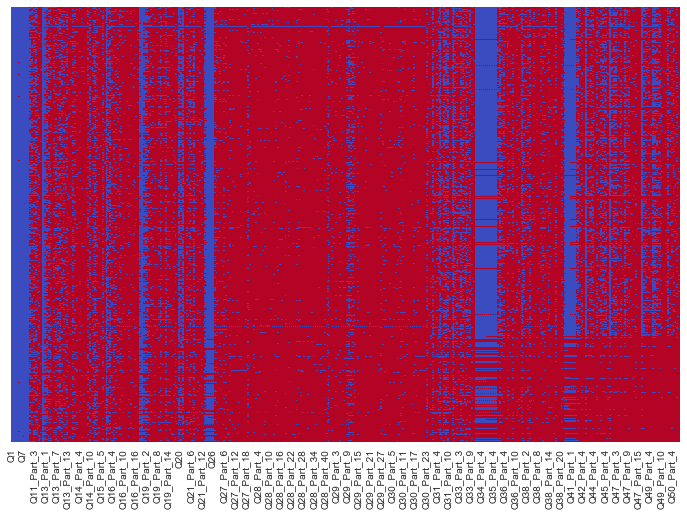

In [14]:
# plotting heat map to check null values 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(sdf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

As we can observe from heat map, there are a lot of missing data in this dataset. Those are more likely the multiple choice questions. 

In [15]:
# finding the percentage of missing value in all features
NaN_Percentage = sdf.isnull().mean().sort_values(ascending=True)
print(NaN_Percentage)

Q1             0.000000
Q2             0.000000
Q3             0.000000
Q4             0.000000
Q6             0.000000
                 ...   
Q29_Part_16    0.997837
Q28_Part_24    0.998356
Q28_Part_22    0.999048
Q38_Part_19    1.000000
Q38_Part_20    1.000000
Length: 359, dtype: float64


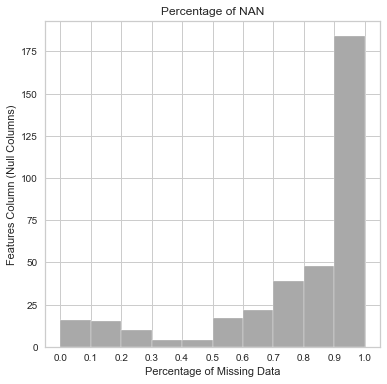

In [16]:
# plotting the percentage of missing value in each column (feature) to % of null columns 
plt.figure(figsize = (6,6))
# percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='darkgrey')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");


we can observe that there are a lot of features having missing values greater than 50%. These features are more likely in multiple choice questions. We can also see from numerical percentage above that Q38_Part_19 and Q38_Part_20 having almost 100% all values are missed or blank. Therefore, these columns will be dropped. 

**To investigate the multiple choice questions affect on the data and identify the features along with its multiple choice feature that has missing values greater than 40%, we did the follwing:** 

1. Identify the multiple choice questins: "Q11","Q13","Q14","Q15","Q16","Q19","Q21","Q27","Q28","Q29","Q30","Q31","Q33","Q34","Q35","Q36","Q38","Q41","Q42","Q44","Q45","Q47","Q49","Q50". 

2. To perform the investigation, we creat a copy of the original data named Tested_sdf. 

3. A loop run for question with multiple choice question (MCQ) and using method startswith in if conditon to locate and test if the start of each sring element matches a pattern in this case question number.If a match found, will be added to auxilary_column. auxiliary column you can consider it as imaginary or temperarory column where it is used to filter and join MCQ to identify the null % of that question that contains MCQ. 

4. Any missing data (NaN) in auxilary column will be filled with blank for consistance of other non multiple choice questions.

5. Converting the column type into string type in case we have numerical data that may cause some error during excuation. The below picture shows how we spot each question with its MCQ.

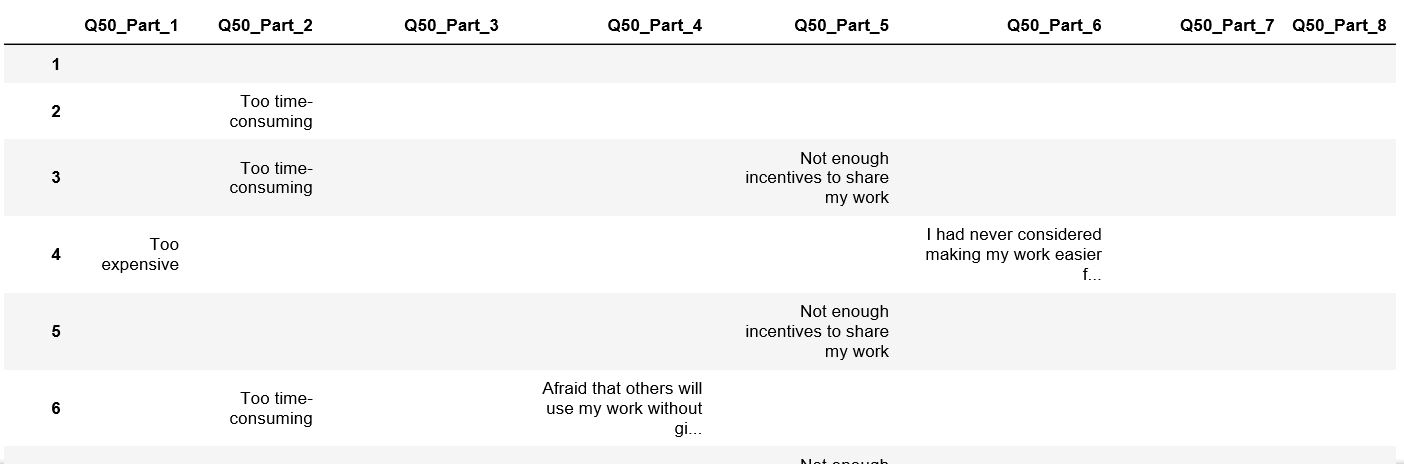

6. Join all columns for the same questions. In the below picture it shows how we join and concatenate all MC of Q5 into one single column.

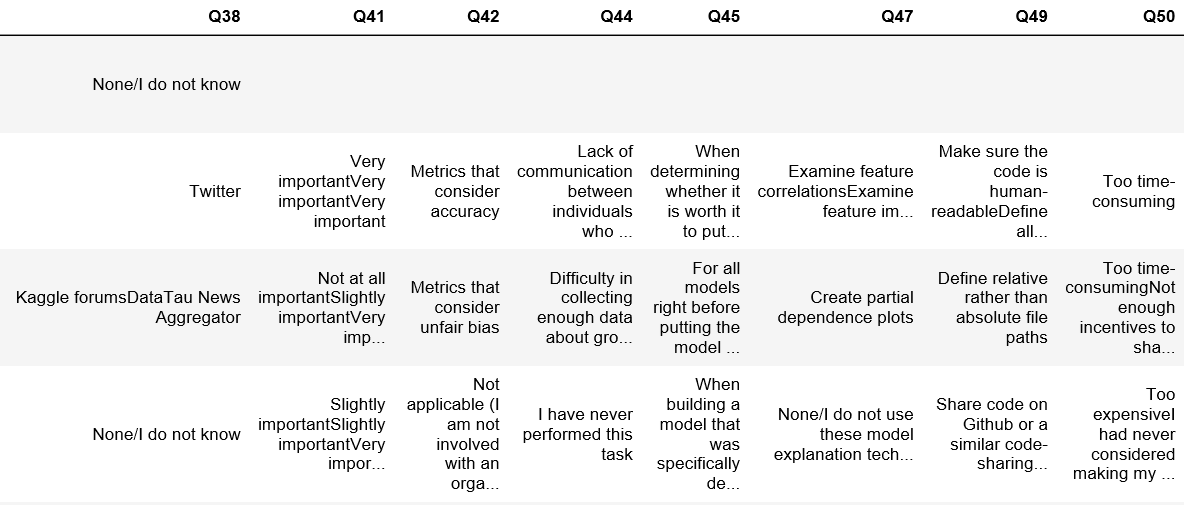

7. Dropping multiple choice question columns after merged into main question.

8. For checking purpose all blanks will be substitued with NaN.

9. Finally we will find and plot the percentage of new merged columns in auxilry column to look into which feature with its multiple choice questions has missing value greater than 40%

In short, any orginal qestion that has multiple choice questions, its multiple choice questions will be added to it as a one column by using join method and above steps. 


**Reference:** 
1. https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.startswith.html 


In [17]:
# Identify the multiple choice questions
MultiChoice_Qs = ["Q11","Q13","Q14","Q15","Q16","Q19","Q21","Q27","Q28","Q29","Q30","Q31","Q33","Q34","Q35","Q36","Q38","Q41","Q42","Q44","Q45","Q47","Q49","Q50"]

In [18]:
# 1.create a copy of data frame for purpose of investigating null in MCQ
Tested_sdf = sdf.copy()

# 2. for loop to iterate through every question with MCQ
for k in MultiChoice_Qs:
    # 3.find the columns which start with the question number by using startswith
    Auxiliary_Col = [col for col in Tested_sdf if col.startswith(k)]
    # 4.filling all missed values or NaN with blanks because it will create error if we comapre blank with null, either all blanks or all null.
    Tested_sdf[Auxiliary_Col] = Tested_sdf[Auxiliary_Col].fillna('')
    # 5.convert the columns to string  
    Tested_sdf[Auxiliary_Col] = Tested_sdf[Auxiliary_Col].astype(str)
    # 6.Join columns (MCQ) with same question
    Tested_sdf[k] = Tested_sdf[Auxiliary_Col].apply(lambda y: ''.join(y), axis=1)
    # 7. dropping the individual columns 
    Tested_sdf.drop(Auxiliary_Col, axis = 1, inplace = True)
   

In [19]:
# replacing blanks with NaN in all the data
Tested_sdf = Tested_sdf.replace(r'^\s*$', np.nan, regex=True)

In [20]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.heatmap(Tested_sdf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

It can be seen that after joining Question that has MC into one columns, the amount of missed data reduced compared to previous heat map.

In [21]:
# finding the percentage of missing values after joining each question with its MCQ
Test_Percentage = Tested_sdf.isnull().mean().sort_values(ascending=True)
print(Test_Percentage)

Q1                     0.000000
Q2                     0.000000
Q3                     0.000000
Q4                     0.000000
Q6                     0.000000
Q7                     0.000000
Q9                     0.000000
Q8                     0.001644
Q10                    0.003979
Q5                     0.007699
Q11                    0.014273
Q12_MULTIPLE_CHOICE    0.032699
Q13                    0.034689
Q14                    0.038322
Q15                    0.040917
Q16                    0.042301
Q18                    0.043772
Q19                    0.046713
Q21                    0.050346
Q23                    0.052422
Q24                    0.053633
Q25                    0.055277
Q26                    0.055709
Q31                    0.122318
Q33                    0.127076
Q38                    0.151557
Q34                    0.167388
Q39_Part_2             0.167734
Q39_Part_1             0.167734
Q40                    0.171799
Q35                    0.174567
Q36     

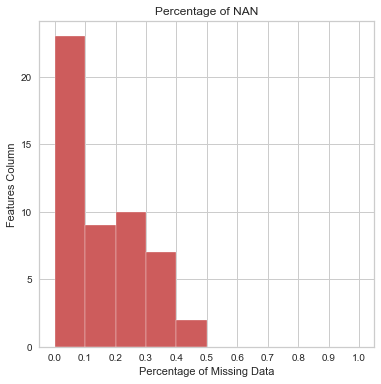

In [22]:
# plot to know how many columns have percentage of missing values or null
plt.figure(figsize = (6, 6))
plt.hist(Test_Percentage, bins = np.linspace(0, 1, 11),facecolor="indianred")
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column'); 
plt.title("Percentage of NAN");

In [23]:
# identifying which column after merging has missing value greater than 40%.
# Test_Percentage >=0.4

We can observe from above that Q30 and Q37 has missing values greater than 40%. However, Q37 is a single question while Q30 is MCQ, therfore, all MCQ associated with Q30 will be dropped. In summary the following question will be dropped: 
1. Q38_Part_19, Q38_Part_20 as they are 100% missing value.
2. Q37 as it has missing values greater than 40%. 
3. Q30 and its MCQs as it has missing values greater than 40%. 

In [24]:
#dropping Q30 and its MCQs from original data
Auxiliary_Col = [col for col in sdf if col.startswith('Q30')]
sdf.drop(Auxiliary_Col, axis = 1, inplace = True)

# dropping Q37,Q38_Part_19 and Q38_Part_20 from original data
sdf.drop(['Q37','Q38_Part_19', 'Q38_Part_20'], axis = 1, inplace = True)

In [25]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.heatmap(Tested_sdf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

### 1.2.2 Imputation Based on Data Dependancy Trend
Imputation is the process of substitute a missing value with another value based on an inference from the given data. There are many techniques used in imputation as discuessed in our class presentation by Group10: 
1. Imputation by Mean or Median. 
2. Imputation by Hot/Cold Deck. 
3. Imputation by Regression (Interpolate). 
4. Imputation by Most Frequent Category. 
5. Imputation by Random Sample. 
6. Imputation by most frequent on mode() based on two inference or more. 

**Note:** 
Doing imputation without figuring out a good inference or dependancy in your features could cause distoration and skewness in the overall dataset. Therfore, here we will use imputation by figuring out a dependacy between features which could give a solid reason to do that substituation. To do that, we will look at first 5 features that contains missed values Q5, Q6, Q7, Q8 and Q9. However, since Q7 is about industry it will not have a good inference, and Q9 is the target feature (Salary) we will ignore it for now. The following Questions will be used as inference: 

* Q2: What is your age (# years)?
* Q5: Which best describes your undergraduate major?
* Q6: Select the title most similar to your current role (or most recent title if retired)?
* Q8: How many years of experience do you have in your current role?


After above checking for good inference we will use a trend to do imputation based on that inference. 

Once analysis done, we figure out that Q6 which describe job title is the best inference. Please see below to follow up.

**For the question asked in assignment, how your approach might impact the overall analysis?** 
1. Since I did a very reasonable cleaning above, I could reduce the proability of having distoration for my target the salary. 
2. As I mentioned before, before doing above cleaning, there were a lot of outliers and I had to reduced them. Therfore, my approach impact on overall analysis is that it improves the score of R2 which you will see it in last section, prior to that I got a very low value for R2.It improves the feature selection, it improve the model implemntation. 
3. Imputation was used to fill in the missing value as losing data which may be valuable may results in making wrong decisions and complicate the study analysis. Therfore, this approach will enhance my model in predicting as I have null values less thatn 50%.  
**Reference:** 
1. https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87
2. https://www.bauer.uh.edu/jhess/documents/2.pdf
3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/
4. https://www.statisticssolutions.com/missing-values-in-data/
5. https://machinelearningmastery.com/handle-missing-data-python/
6. https://en.wikipedia.org/wiki/Missing_data#Missing_completely_at_random
7. https://appdividend.com/2019/01/28/python-mode-function-example-python-statistics-tutorial/ 
8. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_value.html 
9. https://pbpython.com/pandas_transform.html


In [26]:
# Q2 does not have missing value, and checked before Q5 and it does not need inferenced.
# 1. Checking & Visualize trends in Q5 missing value with other features
sdf[sdf["Q5"].isnull()].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
235,Male,25-29,China,No formal education past high school,NaN,Software Engineer,Accounting/Finance,5-10,30550,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN
831,Male,35-39,United Kingdom of Great Britain and Northern I...,No formal education past high school,NaN,Other,Insurance/Risk Assessment,3-4,153986,We are exploring ML methods (and may one day p...,...,None/I do not make my work easy for others to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
991,Male,40-44,Czech Republic,No formal education past high school,NaN,Software Engineer,Accounting/Finance,10-15,43813,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,Male,30-34,Belarus,No formal education past high school,NaN,Software Engineer,Computers/Technology,5-10,29820,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN
1544,Male,22-24,Japan,No formal education past high school,NaN,Product/Project Manager,Online Service/Internet-based Services,1-2,18071,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can observe that most of missing value (NaN) in Q5 have a reason for lefting this cell unfilled, this reason can be found in Q4 which is "No formal education past high school". Therefore, for now, any NaN or missed value in Q5 will be filled with "NONE" as participant did not have a undergrade degree. 

In [27]:
# replace each NaN value in Q5 with NONE, we use set_value as we will pass a single value to a column
sdf['Q5'] = sdf['Q5'].fillna('NONE')

In [28]:
# Q6 checked does not have any missing value, and does not need inference. 
# 2. Checking trends in Q8 missing value with other features
sdf[sdf["Q8"].isnull()].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
1154,Female,22-24,United Kingdom of Great Britain and Northern I...,Doctoral degree,"Medical or life sciences (biology, chemistry, ...",Student,I am a student,NaN,16657,We use ML methods for generating insights (but...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
1418,Male,50-54,India,Doctoral degree,Engineering (non-computer focused),Data Scientist,Academics/Education,NaN,29302,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these reasons apply to me,NaN
1618,Female,22-24,"Iran, Islamic Republic of...",Master’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,1825,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,Female,25-29,United States of America,Doctoral degree,Mathematics or statistics,Student,I am a student,NaN,15886,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN
3578,Male,25-29,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Student,I am a student,NaN,13331,I do not know,...,NaN,NaN,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,Not enough incentives to share my work,NaN,NaN,NaN


In [29]:
# find percentage of missing value in Q8 along with Title or job of participant. 
print (pd.DataFrame({'NaN % Q8':sdf[sdf['Q8'].isnull()]['Q6'].value_counts(normalize=True)}))

                    NaN % Q8
Student             0.473684
Business Analyst    0.210526
Data Analyst        0.105263
Research Scientist  0.052632
Data Scientist      0.052632
Other               0.052632
Consultant          0.052632


We can see that student has the most missing values or NaN percentage in Q8 can have a good inference from Q6 (Job), as majority of NaN are students 84.2%.Therefore, to imputate for any missing value in Q8 we can use Q6 with mode() method which will make a good imputation from both features of Job. 

In [30]:
# Imputate the missing value in Q8 by using inference from both Q2(age) and Q6(Title)
sdf['Q8'] = sdf.groupby(['Q6']).Q8.transform(lambda y: y.fillna(y.mode()[0]))

####  As we have here different type of features, multiple choice question, single categorical question and single numerical question . We have to do a for loop to imputate each type of feature, and all of them will imputated by taking an inference from Q6 the title (job) of participant. 

#### * Imputate Single Categorical Question
The missing values and NaN will be replaced by value based on inferernce from Q6 by using mode() by collecting and organizing data to count the frequency of each result. The folllowing are single categorical questions. 
"Q10","Q12_MULTIPLE_CHOICE", "Q17","Q18","Q20","Q22","Q23","Q24","Q25","Q26","Q32","Q39_Part_1","Q39_Part_2","Q40","Q43","Q46","Q48"


In [31]:
SingCat_Qs = ['Q10','Q12_MULTIPLE_CHOICE',"Q17","Q18","Q20","Q22","Q23","Q24","Q25","Q26","Q32","Q39_Part_1","Q39_Part_2","Q40","Q43","Q46","Q48"]

In [32]:
def Imputate_SingCat(List):
    # loop to run inside list of single question 
    for k in List:
        # imputate missing value or NaN based on inference from Q6 title of partcipant 
        sdf[k] = sdf.groupby(['Q6'])[k].transform(lambda y: y.fillna(y.mode()[0]))

In [33]:
# call function to imputation singel catergorical question
Imputate_SingCat(SingCat_Qs)

#### * Imputate Multiple Choice Numerical Question
As we have here a numerical values, we will not use mode() method, rather we will use the mean() of that column and inference from Q6 title of participant. There are only two multipl choice numerical questions here Q34 and Q35. 

In [34]:
SingNum_Qs = ["Q34","Q35"]

In [35]:
def Imputate_SingNum(List):
    # loop to run inside list of numerical question
    for k in List:
        # find the MCQ for each question
        Auxiliary_Col = [col for col in sdf if col.startswith(k)]
        #if col list is not empty we go ahead
        if Auxiliary_Col:
            sdf[Auxiliary_Col] = sdf[Auxiliary_Col].astype(float)
            for i in Auxiliary_Col:
                sdf[i] = sdf.groupby(['Q6'])[i].transform(lambda y: y.fillna(y.mean()))

In [36]:
# call function to imputate single MC numerical questions
Imputate_SingNum(SingNum_Qs)

#### * Imputate Multiple Choice Questions
Here we will have to imputate a categorical multiple choice questions. As most steps above, same steps just we added some check points as we are dealing with a lot of columns here just to make sure nothing is missed. The following steps taken:
1. Identify the multiple choice questions, and group them in list. This will be passed to Imputation function of MCS. 
2. Creat a function that to take care of imputation MCQ. 
3. Find columns which start with the same question number. 
4. Fill all missed values or NaN with "MISSED" as it was left empty from respondant intentationally.
5. Join columns (MCQ) with same question to create new column.
6. Imputate all MISSED value with inference from mode() of Q6 the title of participant. 
7. Rearrange data to its original columns by splitting new column and dropping individula columns.

All missed data will be imputated by using the mode based inferernce from Q6 title of partcipants

In [37]:
# 1. Identify the MCQ and creat list
MultiChoice_Qs = ["Q11","Q13","Q14","Q15","Q16","Q19","Q21","Q27","Q28","Q29","Q31","Q33","Q36","Q38","Q41","Q42","Q44","Q45","Q47","Q49","Q50"]

In [38]:
#2.creating function to imputate MCQ 
def Imputate_Multi(List):
    # 2.1 create a loop to run inside list of MCQ
    for j in List:
        
        # 3. find the columns that start with the same question number
        Auxiliary_Col = [col for col in sdf if col.startswith(j)]
        
        # 3.1 check if there is matching question from list of MCQ
        if Auxiliary_Col:
            check = ''
            i=0
            
            # 3.2 run a loop for every individual column and create counter for sequence of rows
            for z in Auxiliary_Col:
                i=i+1
                
                # 4. substitute NaN with MISSED
                sdf[z] = sdf[z].fillna('MISSED')
                
                # 4.1 check counter for row, as long it is less than total length, it will continue
                if(i<len(Auxiliary_Col)):
                    
                    # 4.2 creating a check to follow what we suppose to replace in point 8 below this code
                    check  = check +'MISSED---'
                else: 
                    check  = check +'MISSED'
            
            # 5. join all the columns for the same question from MCQ and create new column Auxikiary_Col in the original dataset        
            sdf[j] = sdf[Auxiliary_Col].apply(lambda y: '---'.join(y), axis=1)
            
            # 6. imputate "MISSED" in check with the mode of Q6. In case the column itself was "MISSED" in checking from begining, we take the second imputation by mode 
            sdf[j] = sdf.groupby(['Q6'])[j].transform(lambda y: y.replace(check,(y.value_counts().index[0])) if y.value_counts().index[0]!=check else y.replace(check,(y.value_counts().index[1])))
            
            # 7. dropping the previous individual columns
            sdf.drop(Auxiliary_Col, axis = 1, inplace = True)
            
            # 8. splitting our new column to create individual columns with NaN replaced
            sdf[Auxiliary_Col] = sdf[j].str.split('---',expand=True)

In [39]:
# call function to imputate multiple choice question
Imputate_Multi(MultiChoice_Qs)

In [40]:
# checking if there is any null after imputation and all clean processes
sdf.isnull().mean().sort_values(ascending=True)

Q1             0.0
Q31_Part_10    0.0
Q31_Part_9     0.0
Q31_Part_8     0.0
Q31_Part_7     0.0
              ... 
Q19_Part_12    0.0
Q19_Part_11    0.0
Q19_Part_10    0.0
Q50_Part_7     0.0
Q50_Part_8     0.0
Length: 352, dtype: float64

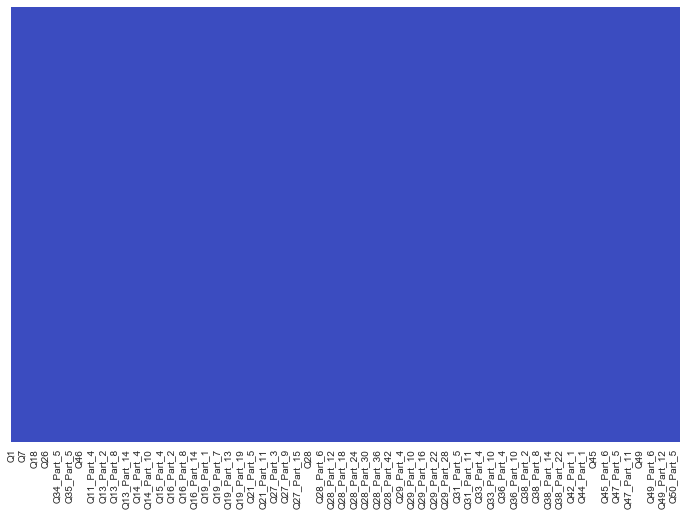

In [41]:
# final step ploting heat map to check if there is any hiden null value lol. 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(sdf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

As we can see, all data we have was imputated, cleaned and no NULL value is shown in heat map, therefore, dataset is ready for one hot encoding and model implementation later on. 

Great work! I could perfectly clean the data and a reasonable imputation. Next step is below. 

### 1.3 Converting Categorical Data into Numerical 

For the ML work with numbers to perform well and do prediction, the why question will be answered in each section here. Therfore, here we have to do the following: 

1. Conver single categorical questions in to numerical. 

In converting single categorical data into numerical, we will use one hot encoding as representation of categorical variables as binary vectors. It will require that categorical values be mapped to integer values. Then each  integer value is represented as a binary vector that is all zero values except the index of the integer which will marked as 1. Doing so, we will be sure that ML can directly work with these numbers. However, as we did above with imputation single questions with a word "NONE" which indicates NaN or left blank based on inference from Q6 job tiltle, we will have to convert these into 0 for any cell having "NONE" and 1 or any cell having a categorical value. We will pass same list of single question above. 


2. Convert single numerical. 

As these values are already numerical, we will have to rescale them into values between 0-1. I obtianed the idea about rescalling from below link, where they use minmax to rescale values. We have only two questions having numerical data those are Q_34 and Q_35.

3. Converting the multiple categorical questions into numerical.

Finally, for converting MCQ, we already imputate above any missing value with word "MISSED", therefore, any cell having "MISSED" will be replaced with 0, and any cell having a value will be replaced by 1. Again we will have to pass the MCQ list as we did above. 


**References**: 
1. https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/ 
2. https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python 
3. https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/ 
4. https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/ 


#### 1.3.1 Converting Single Categorical Questions

In [42]:
# create a list of single categorical questions
SingCat_QsConv = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8","Q10","Q12_MULTIPLE_CHOICE","Q17","Q18","Q20","Q22","Q23","Q24","Q25","Q26","Q32","Q39_Part_1","Q39_Part_2","Q40","Q43","Q46","Q48"]

In [43]:
# defining original sdf as global to avoid confusion of considering it as local when we concatinate below
global sdf
# loop to run inside each single question in list above
for k in SingCat_QsConv:
    # check if the column is in global oringal data
    if k in sdf:
        # if it is in there, we proceed 
        # create dummies 
        sdf_dummies = pd.get_dummies(sdf[k], prefix = k) # add prefix so each split dummy take question number it belongs
        # we concatinate the dummies with original data such that we have orginal data for single questions + dummies
        sdf_test = pd.concat([sdf,sdf_dummies[sdf_dummies.columns[:-1]]], axis = 1)
        # we again store all data back to original global one but we drop the columns that are no longer dummies, rather we will use dummies generated from them
        sdf = sdf_test.drop([k], axis = 1) 

In [44]:
sdf_dummies.head()

,Q48_I am confident that I can explain the outputs of most if not all ML models,Q48_I am confident that I can understand and explain the outputs of many but not all ML models,Q48_I do not know; I have no opinion on the matter,"Q48_I view ML models as ""black boxes"" but I am confident that experts are able to explain model outputs","Q48_Yes, most ML models are ""black boxes"""
2,0,1,0,0,0
3,1,0,0,0,0
5,0,1,0,0,0
7,0,0,1,0,0
8,0,0,0,1,0


#### 1.3.2 Converting Single Numerical Questions by Rescalling

In [45]:
# create a numerical column that contains a list of columns coming from Q34 and Q35
Num_Column = [col for col in sdf if col.startswith('Q34')] + [col for col in sdf if col.startswith('Q35')] 

# Rescal the values in columns into value between 0 & 1 by using Minmax scale obtained from above link in refereces in section 1.3
sdf[Num_Column]=(sdf[Num_Column]-sdf[Num_Column].min())/(sdf[Num_Column].max()-sdf[Num_Column].min())

In [46]:
sdf[Num_Column].head()

,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6
2,0.168416,0.227994,0.135581,0.189738,0.07923,0.112253,0.314555,0.299643,0.125437,0.152609,0.160761,0.030918
3,0.020000,0.030000,0.200000,0.500000,0.20000,0.000000,0.000000,0.000000,0.000000,1.000000,0.090909,0.000000
5,0.100000,0.100000,0.200000,0.100000,0.20000,0.230000,0.200000,0.400000,0.200000,0.200000,0.090909,0.000000
7,0.000000,0.300000,0.500000,0.000000,0.00000,0.200000,0.500000,0.200000,0.300000,0.000000,0.090909,0.000000
8,0.200000,0.300000,0.200000,0.200000,0.05000,0.050000,0.750000,0.050000,0.200000,0.000000,0.090909,0.000000


#### 1.3.3 Converting Multiple Categorical Data into numerical 

**If there is a value = 1.


**If there is no value ( which is already imputeted as "MISSED") = 0.

In [47]:
for k in MultiChoice_Qs:
    Auxiliary_Col = [col for col in sdf if col.startswith(k)]
    for j in Auxiliary_Col: 
        sdf[j] = np.where(sdf[j]=='MISSED', 0, 1)

In [48]:
sdf.head()

,Q9,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q35_Part_1,Q35_Part_2,Q35_Part_3,...,Q46_30-40,Q46_40-50,Q46_50-60,Q46_60-70,Q46_70-80,Q46_80-90,Q48_I am confident that I can explain the outputs of most if not all ML models,Q48_I am confident that I can understand and explain the outputs of many but not all ML models,Q48_I do not know; I have no opinion on the matter,"Q48_I view ML models as ""black boxes"" but I am confident that experts are able to explain model outputs"
2,18668,0.168416,0.227994,0.135581,0.189738,0.07923,0.112253,0.314555,0.299643,0.125437,...,0,0,0,0,0,0,0,1,0,0
3,2726,0.020000,0.030000,0.200000,0.500000,0.20000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
5,682,0.100000,0.100000,0.200000,0.100000,0.20000,0.230000,0.200000,0.400000,0.200000,...,0,0,0,0,0,0,0,1,0,0
7,11957,0.000000,0.300000,0.500000,0.000000,0.00000,0.200000,0.500000,0.200000,0.300000,...,0,0,0,0,0,0,0,0,1,0
8,2696,0.200000,0.300000,0.200000,0.200000,0.05000,0.050000,0.750000,0.050000,0.200000,...,0,0,0,0,0,0,0,0,0,1


# 2. Exploratory Analysis and Visualization
In this section, we will subdivide it into two parts as assigned in the assignment. 
1. Presenting three graphical figures that represent trends. 
2. Visualize the order of featureimportance. 


## 2.1 Graphical Figures and Trends in Data
Here we will present 3 graphical figures and data trends based on the following order: 
1. Country 

As each country has different trends in industry, we though the a good begining to look into country as it will give us a general overniew of data we have and it can give us a good classification of countries. 

2. Age

Once we get a clear idea from country trend, we would like to know how age may affect the salary of the partcipant. It will lead us to examining the work experience. 

3. Education



### 2.1.1 Country Trend Analysis
Here we will look into the following: 

1. Find total number of respondants per each country.

2. Find and analysis any trends in average salary with country of the participants. 
3. Classify the countries dataset into respective continent where we will visualize continents and average salary for each continent. 

4. Finally, we will provide a conclusion for trend in average salary with respect to continent and country. 

 


In [49]:
# creating a list of country column from dataset after hot encoding
Q3_country= [col for col in sdf if col.startswith('Q3_')]
# delete index 20 "Q3_I do not wish to disclose my location", and index 35 "Q3_Other" for purpose of shift them to end of the list.
del Q3_country[20]
del Q3_country[35]
# add above delted indexes to data at the end of list
Q3_country.append("Q3_I do not wish to disclose my location")
Q3_country.append("Q3_Other")
print(Q3_country)

['Q3_Argentina', 'Q3_Australia', 'Q3_Austria', 'Q3_Bangladesh', 'Q3_Belarus', 'Q3_Belgium', 'Q3_Brazil', 'Q3_Canada', 'Q3_Chile', 'Q3_China', 'Q3_Colombia', 'Q3_Czech Republic', 'Q3_Denmark', 'Q3_Egypt', 'Q3_Finland', 'Q3_France', 'Q3_Germany', 'Q3_Greece', 'Q3_Hong Kong (S.A.R.)', 'Q3_Hungary', 'Q3_India', 'Q3_Indonesia', 'Q3_Iran, Islamic Republic of...', 'Q3_Ireland', 'Q3_Israel', 'Q3_Italy', 'Q3_Japan', 'Q3_Kenya', 'Q3_Malaysia', 'Q3_Mexico', 'Q3_Morocco', 'Q3_Netherlands', 'Q3_New Zealand', 'Q3_Nigeria', 'Q3_Norway', 'Q3_Pakistan', 'Q3_Peru', 'Q3_Philippines', 'Q3_Poland', 'Q3_Portugal', 'Q3_Republic of Korea', 'Q3_Romania', 'Q3_Russia', 'Q3_Singapore', 'Q3_South Africa', 'Q3_South Korea', 'Q3_Spain', 'Q3_Sweden', 'Q3_Switzerland', 'Q3_Thailand', 'Q3_Tunisia', 'Q3_Turkey', 'Q3_Ukraine', 'Q3_United Kingdom of Great Britain and Northern Ireland', 'Q3_United States of America', 'Q3_I do not wish to disclose my location', 'Q3_Other']


In [50]:
# split the first part of country column which is "Q3" such that we will be left with only name of country
Name = [i.split("_")[1] for i in Q3_country]
print(Name)

['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong (S.A.R.)', 'Hungary', 'India', 'Indonesia', 'Iran, Islamic Republic of...', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Romania', 'Russia', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'I do not wish to disclose my location', 'Other']


In [51]:
# create a data frame having Q3_Country and its splitted name.
Country_df = pd.DataFrame(data={"Q3_Country":Q3_country,"Countries":Name}) 
Country_df.loc[Country_df['Countries'] == 'Iran, Islamic Republic of...', "Countries"] = "Iran"
Country_df.loc[Country_df['Countries'] == 'Hong Kong (S.A.R.)', "Countries"] = 'Hong Kong'
Country_df.loc[Country_df['Countries'] == 'Republic of Korea', "Countries"] = 'North Korea'
Country_df.loc[Country_df['Countries'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'United Kingdom'

In [52]:
# defining lists for each contient with mentioned country
africa=['Nigeria','South Africa','Egypt','Kenya','Tunisia','Morocco']
america=['United States of America','Canada','Mexico','Brazil','Colombia','Argentina','Peru','Chile']
asia=['India','China','Russia','Japan','South Korea','Singapore','Israel','Indonesia','Pakistan','Viet Nam','Malaysia','Iran','Bangladesh','Hong Kong','Thailand','Philippines','North of Korea']
europe=['Germany','United Kingdom','France','Spain','Italy','Turkey','Poland','Netherlands','Ukraine','Switzerland','Portugal','Sweden','Greece','Belgium','Denmark','Ireland','Hungary','Belarus','Romania','Finland','Norway','Czech Republic','Austria']
ocenia=['Australia','New Zealand']


def getContinent(country):
    if country in asia:
        return "Asia"
    elif country in ocenia:
        return "Oceania"
    elif country in africa:
        return "Africa"
    elif country in europe:
        return "Europe"
    elif country in america:
        return "America"
    else:
        return "Other"
# adding continent column to country data frame for purpose on analysis below    
Country_df['continent'] = Country_df["Countries"].apply(lambda x: getContinent(x))

In [53]:
Country_df.head(10)

,Q3_Country,Countries,continent
0,Q3_Argentina,Argentina,America
1,Q3_Australia,Australia,Oceania
2,Q3_Austria,Austria,Europe
3,Q3_Bangladesh,Bangladesh,Asia
4,Q3_Belarus,Belarus,Europe
5,Q3_Belgium,Belgium,Europe
6,Q3_Brazil,Brazil,America
7,Q3_Canada,Canada,America
8,Q3_Chile,Chile,America
9,Q3_China,China,Asia


In [54]:
# creating a copy from original dataset
country_trial = sdf.copy()

#run a loop for every country 
for k in [Q3_country]:
    # replace 0 with null and 1 with the column Name
    country_trial[k] = np.where(country_trial[k]==0, '', k)
    
# join country name to generate one column
country_trial["Q3_Country"] = country_trial[Q3_country].apply(lambda y: ''.join(y), axis=1)

#drop all individual columns 
country_trial = country_trial.drop(Q3_country, axis=1)
# drop any rows where respondant did not disclaim his country
country_trial = country_trial[country_trial.Q3_Country != 'Q3_I do not wish to disclose my location' ]
country_trial = country_trial[country_trial.Q3_Country != 'Q3_Other' ]
# Merge with the created countries data frame to get the name of the countries and their contient
country_trial= pd.merge(country_trial,Country_df ,how='left',  on=["Q3_Country"])

# dropping the column with "Q3_Country"
country_trial = country_trial.drop(["Q3_Country"], axis = 1)
# because the data was one hot encoding where one country was dropped, we have to manually add it, I really do not why it was missed during hot encoding
country_trial['Countries'] = country_trial['Countries'].replace('', 'Vietnam')

#### Plot the number of participants for each country

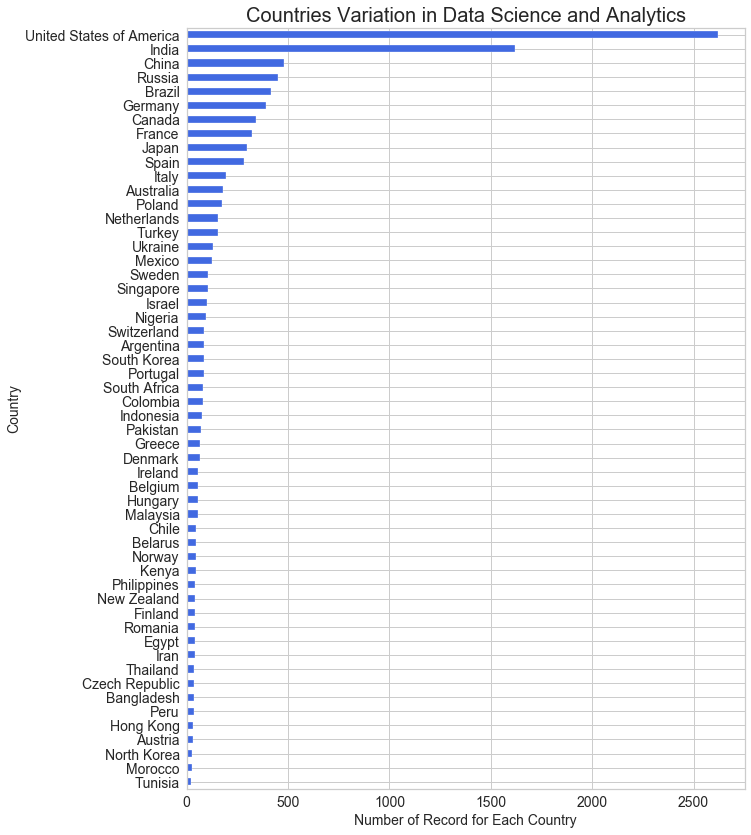

In [55]:
# plot the number of records for each country
plt.figure(figsize = [10,14])
country_trial['Countries'].value_counts().sort_values(ascending=True).plot(kind='barh',color='royalblue')
plt.title("Countries Variation in Data Science and Analytics", fontsize=20)
plt.xlabel("Number of Record for Each Country", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tick_params(labelsize=14);

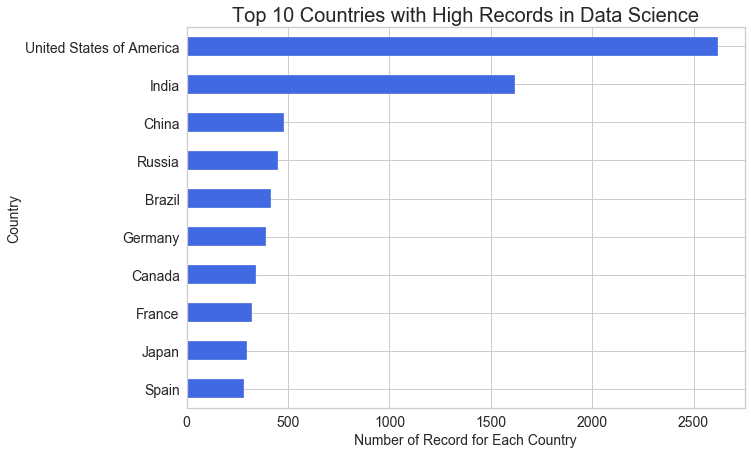

In [56]:
# Visualize top 5 countries having high records of roles in field of data
plt.figure(figsize = [10,7])
a = country_trial['Countries'].value_counts().sort_values(ascending=False).head(10)
a.sort_values(ascending=True).plot(kind='barh',color='royalblue')
plt.title("Top 10 Countries with High Records in Data Science", fontsize=20)
plt.xlabel("Number of Record for Each Country", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tick_params(labelsize=14);

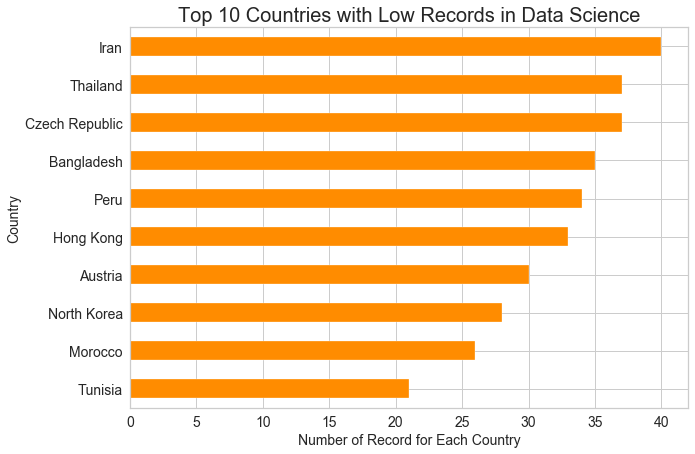

In [57]:
# Visualize top 5 countries having high records of roles in field of data
plt.figure(figsize = [10,7])
b = country_trial['Countries'].value_counts().sort_values(ascending=True).head(10)
b.sort_values(ascending=True).plot(kind='barh',color='darkorange')
plt.title("Top 10 Countries with Low Records in Data Science", fontsize=20)
plt.xlabel("Number of Record for Each Country", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tick_params(labelsize=14);

**Observation:** 
There are huge number of participants from United States and India. Following those are China, Russia, Brazil and Germany. Unfortunately Canada is not amonge the first top countries in here. However, most likely the first top 10 countries are developed countries. USA and India is showing an interesting trend here.  

#### Plot the average salary for each country

Does living on certain contries impact the average compensation you get? This will be answered here.

In [58]:
# convert salary into flot for percision of countrying 
country_trial["Q9"]=country_trial["Q9"].astype(float)

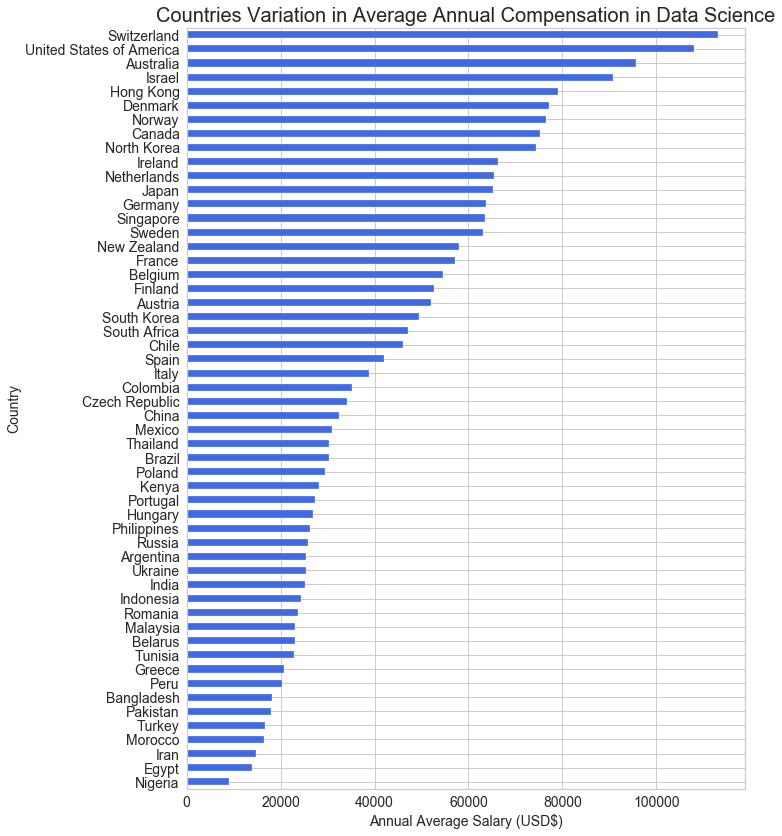

In [59]:
# plot the number of records for each country
plt.figure(figsize = (10,14))
country_trial.groupby(['Countries'])["Q9"].mean().sort_values(ascending=True).plot(kind='barh',color='royalblue')
plt.title("Countries Variation in Average Annual Compensation in Data Science", fontsize=20)
plt.xlabel("Annual Average Salary (USD$)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tick_params(labelsize=14);

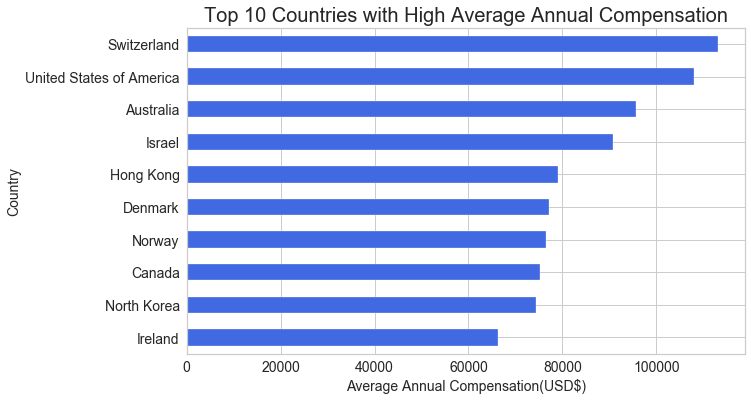

In [60]:
# Visualize top 5 countries having high average annual compensation in data science role
plt.figure(figsize = [10,6])
c = country_trial.groupby(['Countries'])["Q9"].mean().sort_values(ascending=False).head(10)
c.sort_values(ascending=True).plot(kind='barh',color='royalblue')
plt.title("Top 10 Countries with High Average Annual Compensation", fontsize=20)
plt.xlabel("Average Annual Compensation(USD$)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tick_params(labelsize=14);

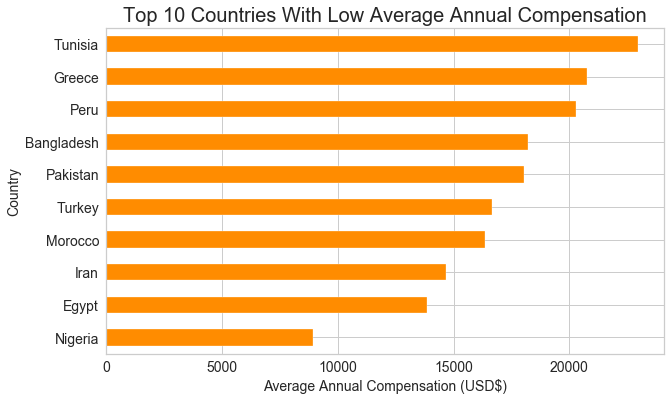

In [61]:
# Visualize top 5 countries having low average annual compensation in data science role
plt.figure(figsize = (10,6))
d = country_trial.groupby(['Countries'])["Q9"].mean().sort_values(ascending=True).head(10)
d.sort_values(ascending=True).plot(kind='barh',color='darkorange')
plt.title("Top 10 Countries With Low Average Annual Compensation", fontsize=20)
plt.xlabel("Average Annual Compensation (USD$)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tick_params(labelsize=14);

**Observation:** 

It can be seen that salaries in Switzerland, USA, Australia, and Israel is relatively high. However, Indial which was above classified as the second most number of respondants its average salary is very low compared to its competitor USA. It is about 1/4 average salary in USA. 

There is an interesting article about this attached here: 

However, I think I could get a good results if I incorprate the cost of living into average salary and normalize that to get right plot for whcih country pays a lot. The reason is that I could not find time to do it for assignment, but for sure I will add it into the final project of this course.

By the way the cost of living in Switzerland is very very expensive, that is why employee there are paid a lot. 

Reference: https://factordaily.com/data-scientist-kaggle-india/

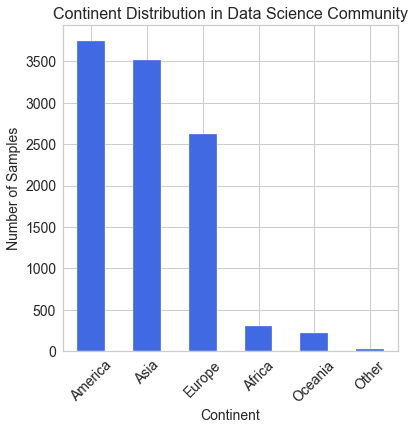

In [62]:
# plot No of records for each continent
import matplotlib.backends
plt.figure(figsize = [6,6])
# matplotlib.use('TKAgg',warn=False, force=True)
# color =['gray','orange','royalblue','brown','coral']
country_trial['continent'].value_counts().plot(kind='bar', color='royalblue')
plt.xlabel("Continent", fontsize = 14)
plt.ylabel("Number of Samples", fontsize = 14)
plt.title("Continent Distribution in Data Science Community", fontsize = 16)
plt.tick_params(labelsize=14);
plt.xticks(rotation=45)
plt.grid(True);

**Overall Observation from Country Trends:**

1. Majority of respondants are from Asia, America and Europe (most of countries there are developed)
2. United States and India are shown high number of respondants specialzed in data science and its relevant area. 
3. Respondants from India make about quarter of their counterparts in United States on annula average salary. 
4. As I observe in annual average salary, I can see that respondants from developed countries like USA, Japan, Canada etc are having high annula average salary compared to those who are from developing countries like Mexico, India, Tunisia..etc 

### 2.1.2 Education Trend Analysis

Here we will look into the following: 

1. Find total number of record for each education level.

2. Find and analysis any trends in average salary with education level of the participants. 

3. Classify the education level into two groups >=Master and <Master and examin the trend in number of records and average salary.  

4. Finally, we will provide a conclusion for trend in average salary with respect to education level. 

In [63]:
# obtain the degree list as Q4_degree
Q4_degree= [col for col in sdf if col.startswith('Q4_')]
print(Q4_degree)

['Q4_Bachelor’s degree', 'Q4_Doctoral degree', 'Q4_I prefer not to answer', 'Q4_Master’s degree', 'Q4_No formal education past high school', 'Q4_Professional degree']


In [64]:
# split the degree name from Q4_degree
Name_degree = [i.split("_")[1] for i in Q4_degree]
print(Name_degree)

['Bachelor’s degree', 'Doctoral degree', 'I prefer not to answer', 'Master’s degree', 'No formal education past high school', 'Professional degree']


In [65]:
# create degree class to classify the degrees
Degre_Class = ['<Masters','>=Masters','I prefer not to answer','>=Masters','<Masters','<Masters']

In [66]:
# create datafreame to store degree names and its class. 
Education_df = pd.DataFrame(data={"Q4_Degree":Q4_degree,"Degree":Name_degree, "Classification":Degre_Class}) 
Education_df

,Q4_Degree,Degree,Classification
0,Q4_Bachelor’s degree,Bachelor’s degree,<Masters
1,Q4_Doctoral degree,Doctoral degree,>=Masters
2,Q4_I prefer not to answer,I prefer not to answer,I prefer not to answer
3,Q4_Master’s degree,Master’s degree,>=Masters
4,Q4_No formal education past high school,No formal education past high school,<Masters
5,Q4_Professional degree,Professional degree,<Masters


In [67]:
# create a copy from original data
education_trial = sdf.copy()

# run a loop for every degree 
for k in [Q4_degree]:
    # replace 0 with null and 1 with the degree column name
    education_trial[k] = np.where(education_trial[k]==0, '', k)
    
# join all degree columns to give us one column
education_trial["Q4_Degree"] = education_trial[Q4_degree].apply(lambda y: ''.join(y), axis=1)

# drop all the other individual columns 
education_trial = education_trial.drop(Q4_degree, axis=1)
education_trial = education_trial[education_trial.Q4_Degree != 'Q4_I prefer not to answer']

# merge with the created countries data frame to get the name of the degree and their class
education_trial = pd.merge(education_trial,Education_df ,how='left',  on=["Q4_Degree"])

# drop the column with Q4_Degree
education_trial = education_trial.drop(["Q4_Degree"], axis = 1)

# replaicng the missing values due to one of the degree level was dropped during One hot encoding. 

education_trial['Classification'] = education_trial['Classification'].replace(np.nan, '<Masters')
education_trial['Degree'] = education_trial['Degree'].replace(np.nan, "Some college/university study without earning a bachelor's degree")

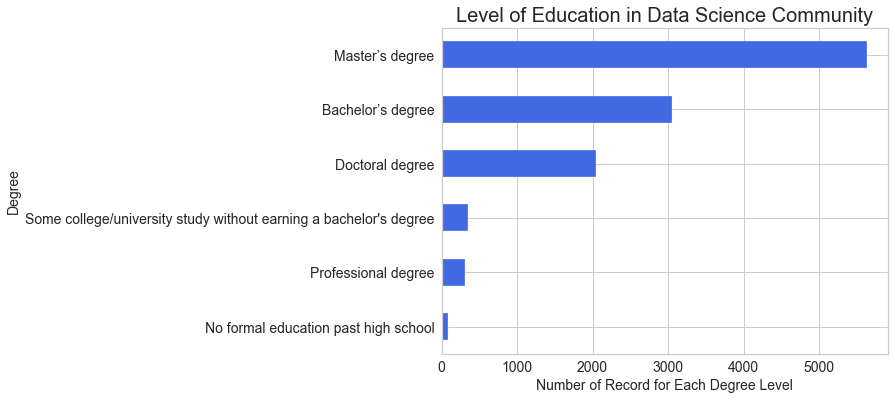

In [68]:
# plot number of record for each degree level
plt.figure(figsize = [8,6])
education_trial['Degree'].value_counts().sort_values(ascending=True).plot(kind='barh',color='royalblue')
plt.title("Level of Education in Data Science Community", fontsize=20)
plt.xlabel("Number of Record for Each Degree Level", fontsize=14)
plt.ylabel("Degree", fontsize=14)
plt.tick_params(labelsize=14);

**Observation:** 

It can be clearly seen that respondants with Master degree are the dominant in this survey with respect to other education level. That implies that some companies favor employee who has master degree in Data Science and Analytics. 

In [69]:
# converting salary varible into float for the purpose of precision in value
education_trial['Q9'] = education_trial['Q9'].astype(float)

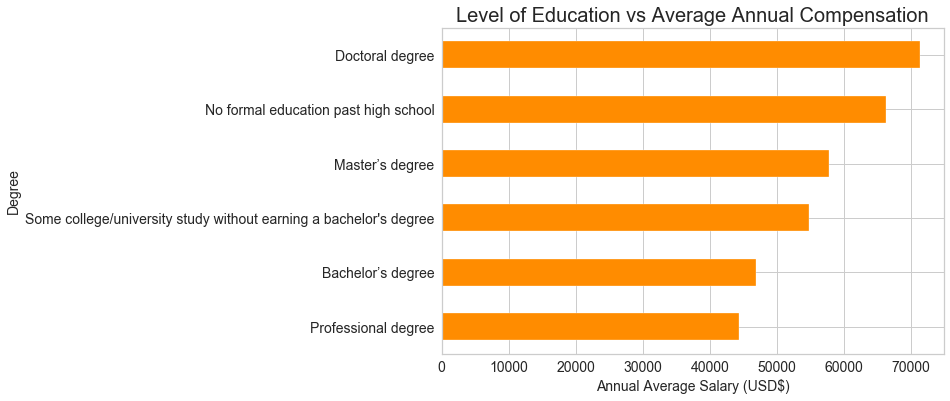

In [70]:
# plot the average salary  for each degree
plt.figure(figsize = (9,6))
education_trial.groupby(['Degree'])["Q9"].mean().sort_values(ascending=True).plot(kind='barh',color='darkorange')
plt.title("Level of Education vs Average Annual Compensation", fontsize=20)
plt.xlabel("Annual Average Salary (USD$)", fontsize=14)
plt.ylabel("Degree", fontsize=14)
plt.tick_params(labelsize=14);

**Observation:** 

There is an irregularity trend, it is not expected at all. Respondants with "No formal education past high school" having the seconf highest salaries!!! this would be a good area to investigate at. Or it could be because those people had a high level of skillls in analytics and programming with accumulated experience they got more salaries. Another possible reason is that those are outliers from others who just run a computer or IT shops and they claim their job.  

However, excluding that, we could see that there is a linear relationship with level of education. The higher the degree of education the higher salary is. This trend looks reasonable. Those who has Phd degree are more likly running a R&D in Data science Companies and getting highly paid as they have deep knowledge in this area. 

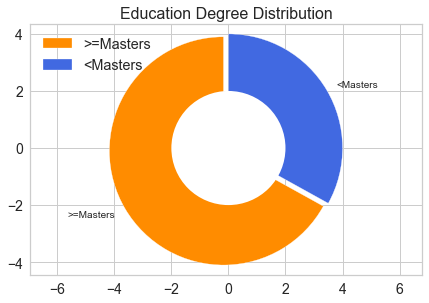

In [71]:
# circle visualization for degree level classes 
def circle_visualizer(education_trial):
    # Data to plot
    labels = ['>=Masters','<Masters']
    sizes = education_trial["Classification"].value_counts()
    colors = ['darkorange','royalblue']
    # explode 1st slice
    explode = (0.2, 0)  
    plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True, explode=explode, radius=4)

    

    # Draw circle
    centre_circle = plt.Circle((0, 0), 2, color='black', fc='white', linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()
    plt.title("Education Degree Distribution", fontsize=16)
    plt.tick_params(labelsize=14)
    plt.legend(fontsize='x-large')
    plt.show();

circle_visualizer(education_trial)

**Observation**: 

It can be seen from above donuts plot that 2/3 of respondants having a degree equal or higher of Master, and the other respondants are more likely Bacholer or No formal education pass high school or college degree. 

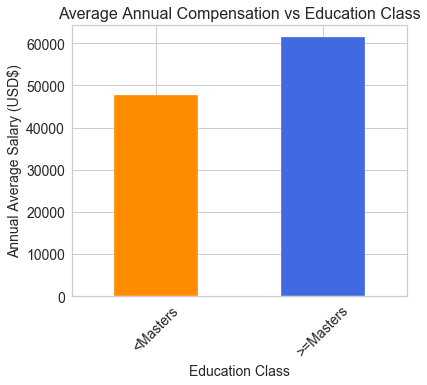

In [72]:
# plot the average salary for each degree class >= Masters vs < Masters
plt.figure(figsize = (6,5))
education_trial.groupby(['Classification'])["Q9"].mean().sort_values(ascending=True).plot(kind='bar',color=['darkorange','royalblue'])
plt.title("Average Annual Compensation vs Education Class", fontsize=16)
plt.ylabel("Annual Average Salary (USD$)", fontsize=14)
plt.xlabel("Education Class", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tick_params(labelsize=14);

**Observation:**

Respondants with a master degree or higher have a higher salary on the average than respondants with education level below master degree. 

**Overall Observation in Education Level Trend:** 
1. High number of participants have master degree. 
2. People with a master degree or higher have high annula average salary compared to other education levels. 

### 2.1.3 Age Trend Analysis

In [73]:
# creating list of age
Q2_age= [col for col in sdf if col.startswith('Q2_')]
print(Q2_age)

['Q2_18-21', 'Q2_22-24', 'Q2_25-29', 'Q2_30-34', 'Q2_35-39', 'Q2_40-44', 'Q2_45-49', 'Q2_50-54', 'Q2_55-59', 'Q2_60-69', 'Q2_70-79']


In [74]:
# splitting age range from "Q2_ age range"
Age_Range = [i.split("_")[1] for i in Q2_age]
print(Age_Range)

['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79']


In [75]:
# creating age classification for each age range mentioned above
Age_Classification = ['<30','<30','<30','>30','>30','>30','>30','>30','>30','>30','>30']

In [76]:
# creating age data frame to store age range and its classification
Age_df = pd.DataFrame(data={"Q2_Age":Q2_age,"Age_Range":Age_Range, "Classification":Age_Classification}) 
Age_df

,Q2_Age,Age_Range,Classification
0,Q2_18-21,18-21,<30
1,Q2_22-24,22-24,<30
2,Q2_25-29,25-29,<30
3,Q2_30-34,30-34,>30
4,Q2_35-39,35-39,>30
5,Q2_40-44,40-44,>30
6,Q2_45-49,45-49,>30
7,Q2_50-54,50-54,>30
8,Q2_55-59,55-59,>30
9,Q2_60-69,60-69,>30


In [77]:
# create a copy from original dataset
age_trial = sdf.copy()

# run a loop for every age period 
for k in [Q2_age]:
    #Replacing 0 with null and 1 with the column Name
    age_trial[k] = np.where(age_trial[k]==0, '', k)
    
# join all age columns to give us one column
age_trial["Q2_Age"] = age_trial[Q2_age].apply(lambda y: ''.join(y), axis=1)

# drop all the individual the columns 
age_trial= age_trial.drop(Q2_age, axis=1)


# merge with the age dataframe to get the age period and their classification
age_trial = pd.merge(age_trial,Age_df ,how='left',  on=["Q2_Age"])

#Dropping the column with COuntry_Columns
age_trial = age_trial.drop(["Q2_Age"], axis = 1)

# replace the missing values due to one of age period was dropped during one hot encoding. 

age_trial['Classification'] = age_trial['Classification'].replace(np.nan, '>30')


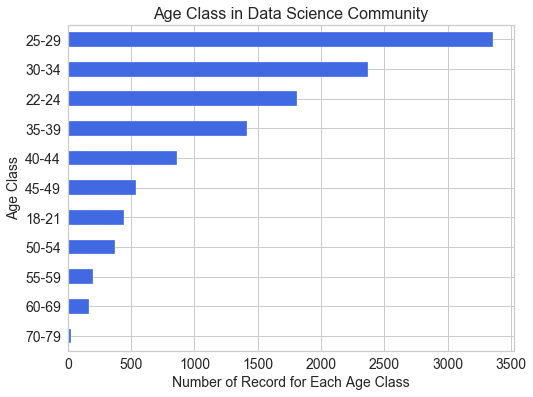

In [78]:
# plot the number of records for each age period group
plt.figure(figsize = [8,6])
age_trial['Age_Range'].value_counts().sort_values(ascending=True).plot(kind='barh',color=['royalblue'])
plt.title("Age Class in Data Science Community", fontsize=16)
plt.xlabel("Number of Record for Each Age Class", fontsize=14)
plt.ylabel("Age Class", fontsize=14)
plt.grid(True)
plt.tick_params(labelsize=14);

**Observation:** 

Respondants in their 20s are the most ones respondants in here specifically those who are witin 25-29. 

In [79]:
# converting the salary into float
age_trial["Q9"]=age_trial["Q9"].astype(float)

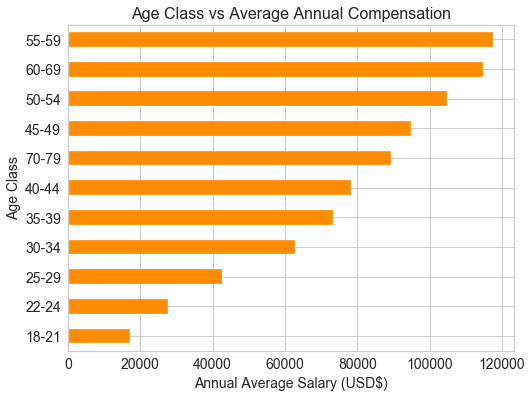

In [80]:
# plot the average salary for each age period group
plt.figure(figsize = (8,6))
age_trial.groupby(['Age_Range'])["Q9"].mean().sort_values(ascending=True).plot(kind='barh',color='darkorange')
plt.title("Age Class vs Average Annual Compensation",fontsize=16)
plt.xlabel("Annual Average Salary (USD$)", fontsize=14)
plt.ylabel("Age Class", fontsize=14)
plt.grid(True)
plt.tick_params(labelsize=14);

**Observation:** 

As respondants age grows up its salary increases, that is because of accumulated years of expereinces of respondants. 

For those who are from 45-79, I could say that they are CEOs or Senior Managers based on their ages resulting in high salary. 

However, I can see an outlier here which is for those who are 70-79, I beleive they should be retired by that age, unless there are different age for retirement for different countries. But I still see that this is an outlier. 

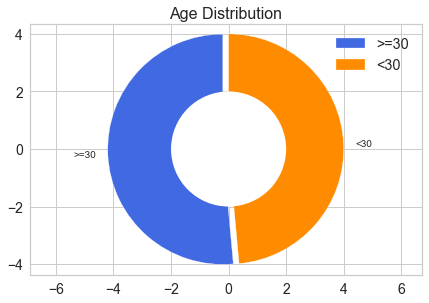

In [81]:
def circle_visualizer(age_trial):
    # Data to plot
    labels = ['>=30','<30']
    sizes = age_trial["Classification"].value_counts()
    colors = ['royalblue','darkorange']
    # explode 1st slice
    explode = (0.2, 0)  
    plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True, explode=explode, radius=4)

    

    # Draw circle
    centre_circle = plt.Circle((0, 0), 2, color='black', fc='white', linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()
    plt.title("Age Distribution", fontsize=16)
    plt.tick_params(labelsize=14)
    plt.legend(fontsize='x-large')
    plt.show();

circle_visualizer(age_trial)

**Observation:** 

The number of participants whose age greater or equal to 30s are slighly more than ones below 30. Not big difference is recongnized. 

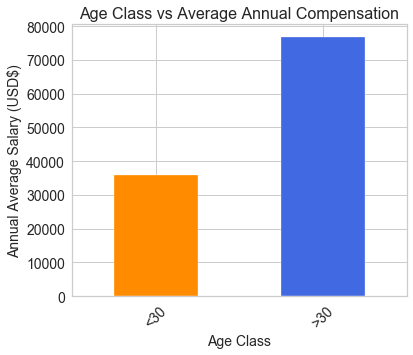

In [82]:
# plot the average salary 
plt.figure(figsize = (6,5))
age_trial.groupby(['Classification'])["Q9"].mean().sort_values(ascending=True).plot(kind='bar',color=['darkorange','royalblue'])
plt.title("Age Class vs Average Annual Compensation", fontsize=16)
plt.ylabel("Annual Average Salary (USD$)", fontsize=14)
plt.grid(True)
plt.xlabel("Age Class", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tick_params(labelsize=14)
plt.show();

**Overall Observation of Age Trends:**

1. A large number of respondants falls with the group of 25-29. 
2. Participants who age above 30s are having high chance of getting good average annual salary, while those who are below 30s are relatively less.  

## 2.2 Visualization of Order of Feature Importance

Here we will create a function that will give us the corrleation value with respect to each feature. The fuction will use a regression technique that will take two inputs.The first input will be all data except the salary column. The secoond input will be only the salary column. Basically, we are creating seperate data into a data set without a salary, and another data with only salary. By thie split we could clearly see the corrleation. 


Then we will we will used graph visualizer for top features with Scikit Lean and Matplotlib, this will give us a deep understanding at which attributes in data are most related to a survey repondents' yearly compensation.

Also we will use correlation matrix to visualize feature importance.


The code for visualzer was copied from the following source.

**Reference:** 
1. https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d 
2. https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

In [83]:
 # Defining a strong reularization function to estimate the corrleation coefficient along with its feature
def feature_regression(X,Y):
    # For regilarization stremghth we use alpha= 7 for the purpose of improving the conditioning of large size problem and reduce variance of the estimate
    reg_fea = Ridge(alpha=6,random_state=42)
    reg_fea.fit(X,Y)
    
    # find absolute value of coeffcient and convert to series
    reg_abs_coe = np.abs(reg_fea.coef_)
    reg_abs_coeSer = pd.Series(reg_abs_coe.tolist(),name='regression')
    
    # return the actual value coefficient and series of absolute value as well
    return pd.Series(reg_fea.coef_) , reg_abs_coeSer
    

In [84]:
# assigning the two inputs
X = sdf.drop(["Q9"], axis = 1) # all data except salary
Y = sdf["Q9"] # only salary column

# creating attributes
Attributes = pd.Series(X.columns.tolist(), name = "Attribute")

# passing inputs value into functino to obtain Absolute value of coefficient and real value to examin affect of features on the salary
Act_Coeff, Abs_Coeff = feature_regression(X,Y)
# creating a new data frame "Correleation_Results"
Correleation_Results = pd.concat([Attributes, Act_Coeff.rename('Actual Coefficient'), Abs_Coeff.rename('Absolute Coefficient')], axis=1)

# Creating a new data frame to store important features
Important_feat = pd.DataFrame()

# arrange data by using absolute value of coeffiecnt
Result = Correleation_Results.sort_values("Absolute Coefficient", ascending = False)

# extracting the first top 15 features
Important_feat['Attributes'] = pd.Series(Result['Attribute'][:20].tolist()) 
# Attaching the Actual Coefficient list into Important feature list
Important_feat['Actual Coefficient'] = pd.Series(Result["Actual Coefficient"][:20].tolist()) 

Important_feat

,Attributes,Actual Coefficient
0,Q3_United States of America,55970.392587
1,Q3_Switzerland,55967.976373
2,Q6_Chief Officer,45970.361821
3,Q3_Australia,43069.178794
4,Q3_Israel,33584.912225
5,Q2_70-79,-29100.390180
6,Q2_22-24,-28141.987438
7,Q8_30 +,27616.730168
8,Q3_Denmark,27508.542273
9,Q3_Canada,27247.378056


In [85]:
# The following code was obtained from a source mentioned above in section 2.2
def plot_coefficients( feature_names, coef , top_features=5):
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['darkslategray' if c < 0 else 'darkorange' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    names = feature_names[top_coefficients]
    plt.xticks(np.arange(0, 1+2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title("Top Features in Datasets", fontsize=20)
    plt.ylabel("Feature Size", fontsize=14)
    plt.ylabel("Feature Name", fontsize=14)
    plt.tick_params(labelsize=14)
    plt.show();
    return names

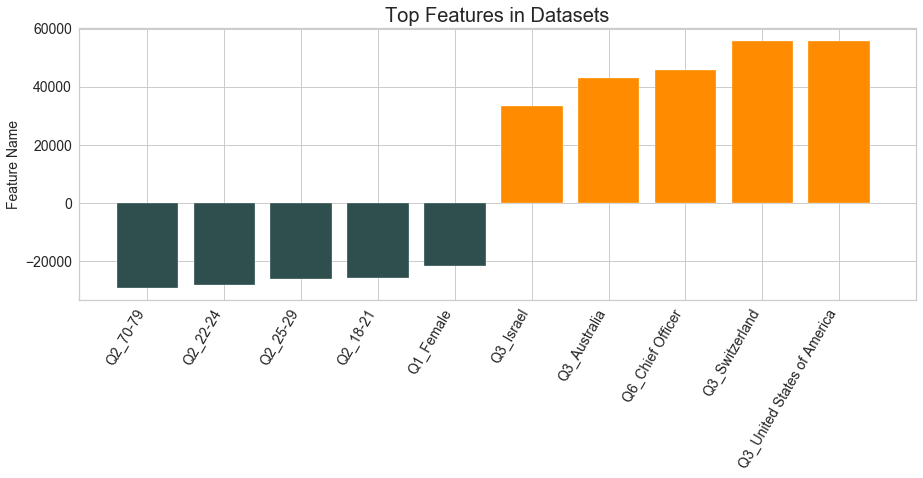

In [86]:
names = plot_coefficients(Important_feat["Attributes"],Important_feat["Actual Coefficient"])

**Observations from above Table and its plot:** 


The yearly compensation has been observed to have a corrleation with some feature, so for a good yearly compensation, one should have the following feature: 

1. In case of job title, being a chief officer has a positive corrleation with salary, as we saw above those who are from 45-79 in term of age have high salaries. 
2. In case of country, being from developed country has a more impact on the salary, Switzerland and United State is an important feature here, they keep appearing in all the plots in positive manner, so one may consider that place in mind for work opportunity, but be careful, living cost in there is very expensive.  
4. In case of age, being in 20s (18-21,22-24,25-29) has a high negative corrleation with yearly compensation.
5. Finally regarding gender, being a female has a  negative corrleation than males. Thus, there are more opportunities for males to get good yearly compensation. You can see it here, but if you increase the number of features, you will see it, but it will take some space and not fit the page. 

In [87]:
# Create a new list contains top 15 attributes from above and appending the salary which is the target of interest
Top_Features = Important_feat["Attributes"][0:20].tolist()
Top_Features.append("Q9")
Trial = sdf[Top_Features]
Trial["Q9"] = Trial["Q9"].astype('float')

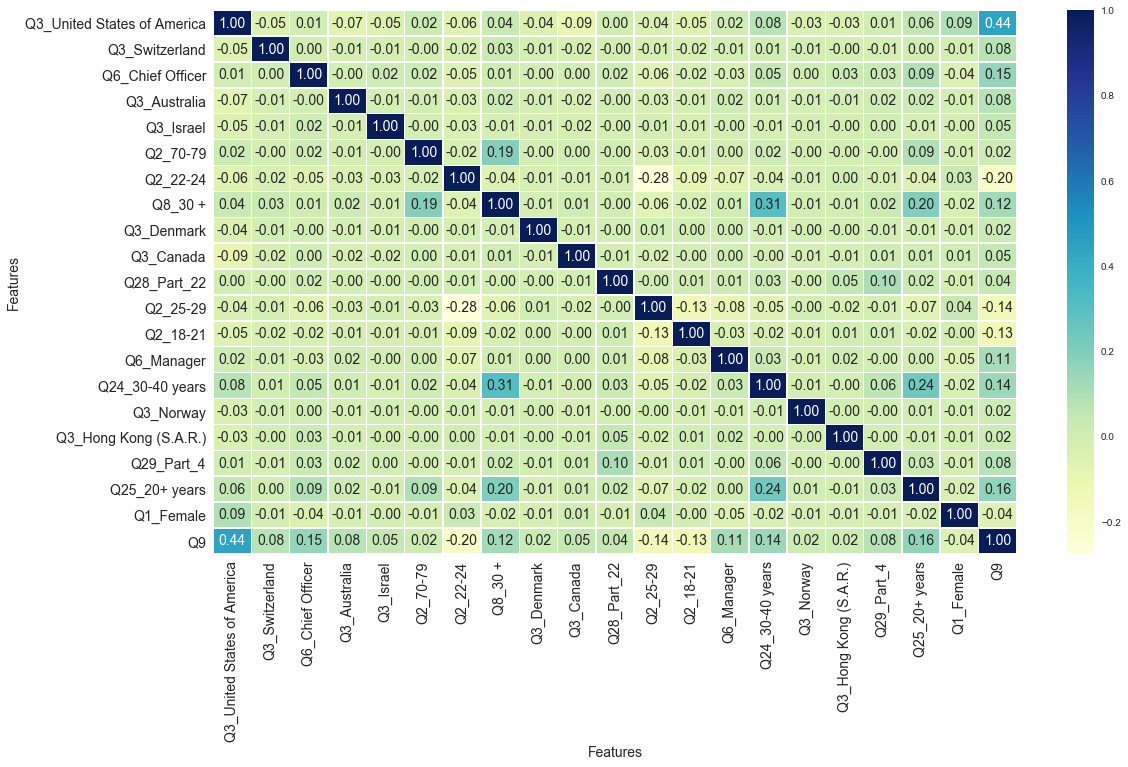

In [88]:
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(Trial.corr(), annot=True,cmap="YlGnBu",annot_kws={"size":14,}, linewidths=.5, fmt='.2f',ax=ax)
plt.ylabel('Features',fontsize=14)
plt.xlabel('Features',fontsize=14)
plt.tick_params(labelsize=14)
plt.show();

In [89]:
Trial.head()

,Q3_United States of America,Q3_Switzerland,Q6_Chief Officer,Q3_Australia,Q3_Israel,Q2_70-79,Q2_22-24,Q8_30 +,Q3_Denmark,Q3_Canada,...,Q2_25-29,Q2_18-21,Q6_Manager,Q24_30-40 years,Q3_Norway,Q3_Hong Kong (S.A.R.),Q29_Part_4,Q25_20+ years,Q1_Female,Q9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18668.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2726.0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,682.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11957.0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2696.0


**Observations from Corrleation Matrix:**

The corrleation matrix shows some features does not have high positive corrleation as ones we have from Ridge in the above table and importance plot. However, it still shows some common strong features such as United States, Chief Officer, Switzerland, however, the matrix shows a postive corrlection for being a manager which was not shown above.  

It depends on different corrlertation methods, but more likely both approach agreed for more than 50% of features.

# 3. Feature Selection

Feature selection or data dimension reduction is the process of identifying the few most important parameters which help in predicting the outcome. Unimportant features will result in unstability in estimating the coefficients in regression model. Therfore, doing feature selection will reduce model computation time, decrease training speed and help in giving good predictive results.There are a lot of techniques used for feature selection, in this assignment we will use only most familar with as explained in class by Prof and other groups, those are the following:

1. Lasso: 

lasso is regression model that uses L1 regularization. L1 regularization adds the absolute value of magnitude of coefficient as penalty term to the cost function. Lasso shrinks the less important feature's coefficient to zero, thus removing some feature altogether. Therefore, it works well for feature selection. Please see reference 7,8 and 9 for more details. 


2. Ridge: 

Ridge is a regression model that uses L2 regularization. L2 regularization adds square magnitude of coefficients as penalty term to cost function (coefficients will be squared and spread out more equally which is different from L1). The effect of L2 is that it makes the model more stable as the coefficient do not fluctuate on the samll data changes as this is the case of L1. L2 is more useful for feature interpretatoion where more likely a predictive feature will get a noon-zero coefficient. Please see reference 7,8 and 9 below for more details. 


3. Random Forest: 

Basically, we will have a number of decision trees where every node in the decision trees is a condition on a single feature designed to split the dataset into two similar response values ending up in the same set. Please see reference 10 and 11 below for more details. 

4. Randomized Lasso (Stability Selection): Is no longer available in sklearn

To explain this technique perfectly, I quote the author explainination. 
" Stability selection is a relatively novel method for feature selection, based on subsampling in combination with selection algorithms (which could be regression, SVMs or other similar method). The high level idea is to apply a feature selection algorithm on different subsets of data and with different subsets of features. After repeating the process a number of times, the selection results can be aggregated, for example by checking how many times a feature ended up being selected as important when it was in an inspected feature subset. We can expect strong features to have scores close to 100%, since they are always selected when possible. Weaker, but still relevant features will also have non-zero scores, since they would be selected when stronger features are not present in the currently selected subset, while irreevant features would have scores (close to) zero, since they would never be among selected features." Please see reference 12 for more details.  

Finally, for each model we will obtain the best 50-300 features, obtain the score by R2 and save results in a dictinonary as it will be used for visualization and as it will be used for model implmentation in next section.


**Reference:** 

The following references were used to explain above techniqes. Some have general knowledge about feature selection, and some have expalinatin and examples explaining each method. For the purpose of this assignment, I used some codes obtained from below link, but I completely modified them as different data has different approach. 

1. http://www.simafore.com/blog/bid/61099/Reasons-why-feature-selection-is-important-in-predictive-analytics 
2. https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0 
3. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 
4. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Adjusted_correlation_coefficient 
5. https://www.kdnuggets.com/2017/06/practical-importance-feature-selection.html
6. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 
7. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c 
8. https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
9. https://scikit-learn.org/stable/modules/feature_selection.html 
10. https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/ 
11. https://blog.datadive.net/selecting-good-features-part-iii-random-forests/ 
12. https://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/ 
 




## 3.1 Lasso Technique

In [90]:
# creating the Functin for Lasso
def Lasso_L1(X,Y):
    # instantiating the object
    lasso = Lasso(alpha=0.05)
    # fitting it to our dataset
    lasso.fit(X,Y)
    # getting the Coeff as absolute
    lasso_AbsCo = np.abs(lasso.coef_)
    # creating a series 
    lasso_AbsCo_Ser = pd.Series(lasso_AbsCo.tolist(),name='LASSO')
    # returning the series 
    return lasso_AbsCo_Ser

## 3.2 Ridge Technique

In [91]:
# creating a function for ridge
def Ridge_L2(X,Y):
    # instantiating the object
    ridge = Ridge(alpha=7)
    # fitting it to our dataset 
    ridge.fit(X,Y)
    # getting the absolute coeff
    ridge_AbsCo = np.abs(ridge.coef_)
    # converting to a series
    ridge_AbsCo_Ser = pd.Series(ridge_AbsCo.tolist(),name='RIDGE')
    # returning the series
    return ridge_AbsCo_Ser

## 3.3 Random Forest Technique

In [92]:
# creating the function for random forest 
def Random_Forest(X,Y):
    # instantiating the object
    clf = RandomForestRegressor(n_estimators=100, min_samples_split = 25, max_depth=35)
    # fitting it to our dataset
    clf.fit(X,Y)
    # getting the feature importance as absolute
    rf_AbsCo = np.abs(clf.feature_importances_)
    # converting to a series
    rf_AbsCo_Ser = pd.Series(rf_AbsCo.tolist(),name='TREE')
    # returing thee series
    return rf_AbsCo_Ser

## 3.4 Randomized Lasso Technique (No-Longer Available in Sklearn)

In [93]:
# # creating a function for randomized lasso
# def Randomized_Lasso(X,Y):
#     # instantiating the object
#     r_lasso = RandomizedLasso(alpha=0.05)
#     # fitting to our dataset
#     r_lasso.fit(X,Y)
#     # getting the absolute scores
#     r_lasso_AbsCo =np.abs(r_lasso.scores_)
#     # converting to a series
#     r_lasso_AbsCo_Ser = pd.Series(r_lasso_AbsCo.tolist(),name='RLASSO')
#     # returning the series
#     return r_lasso_AbsCo_Ser

In [94]:
# creating X and Y from our Dataset
X = sdf.drop(['Q9'], axis=1)
Y =sdf['Q9'].astype(float)
# getting the attribute list
Attributes = pd.Series(X.columns.tolist(), name = 'Attribute')

# calling all the functions
Lasso1= Lasso_L1(X,Y)
Ridge1 = Ridge_L2(X,Y)
Tree1 = Random_Forest(X,Y)
# Rlasso1 = Randomized_Lasso(X,Y)


In [95]:
# store the results for feature selection purpose in data frame 
Results_Fea = pd.concat([Attributes, Lasso1, Ridge1, Tree1], axis=1)
Results_Fea.head()

,Attribute,LASSO,RIDGE,TREE
0,Q34_Part_1,5021.684869,4234.300707,0.006431
1,Q34_Part_2,8505.247842,7892.055225,0.002834
2,Q34_Part_3,16603.404677,15229.219873,0.003071
3,Q34_Part_4,5803.649871,5393.185161,0.004115
4,Q34_Part_5,1872.078193,1803.961404,0.007897


In [96]:
# rescalling and normalizingt the data with MinMax becuase we have some values not in 0-1
Results_Fea[["LASSO", "RIDGE", "TREE"]] -= Results_Fea[["LASSO", "RIDGE", "TREE"]].min()
Results_Fea[["LASSO", "RIDGE", "TREE"]] /= (Results_Fea[["LASSO", "RIDGE", "TREE"]].max() - Results_Fea[["LASSO", "RIDGE", "TREE"]].min())


In [97]:
models = ["LASSO", "RIDGE", "TREE"]
Best_Feature=pd.DataFrame()
for k in models:
    fe = Results_Fea.sort_values(by=k, ascending=False)
    Best_Feature[k] = pd.Series(fe['Attribute'][:10].tolist())
Best_Feature

,LASSO,RIDGE,TREE
0,Q2_70-79,Q3_United States of America,Q3_United States of America
1,Q2_22-24,Q3_Switzerland,Q2_22-24
2,Q2_25-29,Q6_Chief Officer,Q2_25-29
3,Q2_18-21,Q3_Australia,"Q10_We have well established ML methods (i.e.,..."
4,Q2_30-34,Q3_Israel,Q24_10-20 years
5,Q2_35-39,Q8_30 +,Q42_Part_1
6,Q2_40-44,Q3_Canada,Q2_18-21
7,Q2_60-69,Q3_Denmark,Q6_Chief Officer
8,Q2_45-49,Q2_70-79,Q7_Academics/Education
9,Q2_50-54,Q2_22-24,Q7_I am a student


In [98]:
# getting the best 50-300 features in the dataset

# define the alogarithm models used above
models = ["LASSO", "RIDGE", "TREE"]
# seting the number of best features in evey loop iteration
No_best_Feat = [i for i in range(50,310,10)]
# creating an empty dictionary to store the results of performance
score_accuracy = {}

for j in models:
    # arranging the feature results obtained above and store them in score results
    score_results = Results_Fea.sort_values(by=j, ascending=False)
    accuracy = []
    # run loop for each value in score results
    for k in No_best_Feat: 
        # store the k best features in column in list form
        col = score_results["Attribute"][:k].tolist()
        # get the subset of the data
        X1 = X[col]
        # split the data set into train and test
        X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size=0.3, random_state=40)
        # fitting the model and getting the performance by using linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        rs2 = model.score(X_test, y_test)
        # append the score
        accuracy.append(rs2)
    # append the accuracy of each model into the accuracy dictionary    
    score_accuracy[j] = accuracy

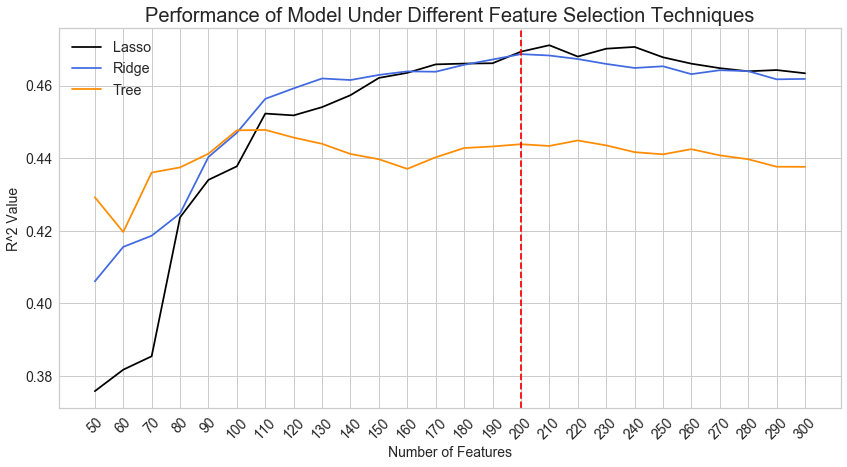

In [99]:
#plotting the scores and performance for each model under various feature size
plt.figure(figsize = (14,7))
plt.plot(No_best_Feat,score_accuracy["LASSO"],  label = "Lasso",color='black')
plt.plot(No_best_Feat,score_accuracy["RIDGE"],  label = "Ridge",color='royalblue')
plt.plot(No_best_Feat,score_accuracy["TREE"],  label = "Tree",color='darkorange')
plt.axvline(x=200,color='red',linestyle='--')
# plt.plot(No_best_Feat,score_accuracy["RLASSO"],  label = "Randomized Lasso")
plt.legend(loc='best')
plt.xticks(No_best_Feat)
plt.xticks(rotation=45)
plt.ylabel('R^2 Value',fontsize=14)
plt.xlabel('Number of Features',fontsize=14)
plt.title('Performance of Model Under Different Feature Selection Techniques', fontsize=20)
plt.tick_params(labelsize=14)
plt.legend(fontsize='x-large')
plt.show();

**Observation:**

From the above performance plot, we could observe the following:
1. Lasso performance the best in terms of estimating R2 value with 50-300 selected features. It reaches high value of R2 by using few features compared to other models. 
2. The maximum peak in the plot for Lasso is at 200 features. The models were tested with 50-310 features, and no improvement happend at all,the maxium number of best feature that gives maximum value for R2 is 200 features. **Thefore, those features will be chosen for model implementation in the next section**.  

In [100]:
# finalizing the best features and store them in column to be used for model implementation
k = No_best_Feat[score_accuracy["LASSO"].index(max(score_accuracy["LASSO"]))]
#We take the subset
b = Results_Fea.sort_values(by="LASSO", ascending=False)
col = b['Attribute'][:k].tolist()

# 4. Model Implementation

The following section will be devided into following sub-sectins: 
 1. Methodology of four chosen regression alogrithms. 
 2. Plot the R2 error score for each model and for overall 10 folds. 
 3. Bias and Variance Analysis for R2 values for choses models by using learning curve. 

## 4.1 Methodology of Four Chosen Regression Alogarithms


As asked in the assignment to use 4 different regression/prediction alogarithms with 10 fold cross validation. It was also required to descirbe the work of each technique and its pros and cons. 

I already describe the work of three regression in section 3 Feature selection, so I will just copy and paste same ones above, and I will add the pros and cons of each one. I will answer why I choose alogarithm based on the advantages/disadvantages. 

**1. Lasso Regression Algorithms** 

lasso is regression model that uses L1 regularization to give an estimate by minimize the sum of square errorwith respect to penalties or constrains. L1 regularization adds the absolute value of magnitude of coefficient as penalty term to the cost function. Lasso shrinks the less important feature's coefficient to zero, thus removing some feature altogether. Please see reference 1,2 and 3 for more details. 

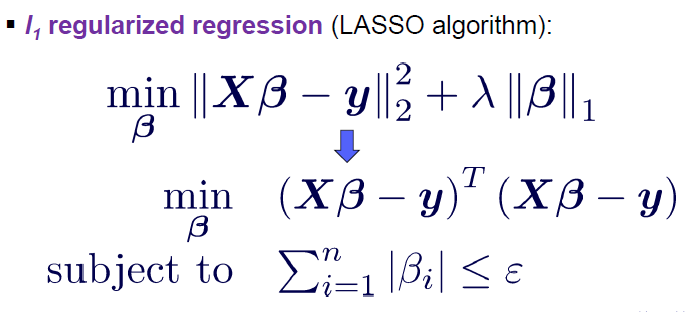

Advantages: 
1. It  prevents overfitting in data as it shrinks coefficint to zero. 
2. It is easy to adjust the regulaization by adjusting the alpha parameter which will hep in hyper tunning for Bias-Variance trade off as it can be seen the following section. 

Disadvantages:  
1. It does not have closed form solution, this computation time is very expensive. During running it does not take long time because we have small data for my best feature, but it does take time for such small features.

**Reference:**
1. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c 
2. https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
3. https://scikit-learn.org/stable/modules/feature_selection.html 
4. MIE 1624 Lecture Note 5
_____________________________________________

**2. Ridge Regression Algorithms** 

Ridge is a regression model that uses L2 regularization to give an estimate by minimize the sum of square error with respect to penalties or constrains ∑β^2<=c . L2 regularization adds square magnitude of coefficients (feature estimator (β)) as penalty term to cost function (coefficients will be squared and spread out more equally which is different from L1). The effect of L2 is that it makes the model more stable as the coefficient do not fluctuate on the samll data changes because coef are linearly distributed as this is not the case of L1. L2 is more useful for feature interpretatoion where more likely a predictive feature will get a noon-zero coefficient. Please see reference 1,2,3 and 4 below for more details. 

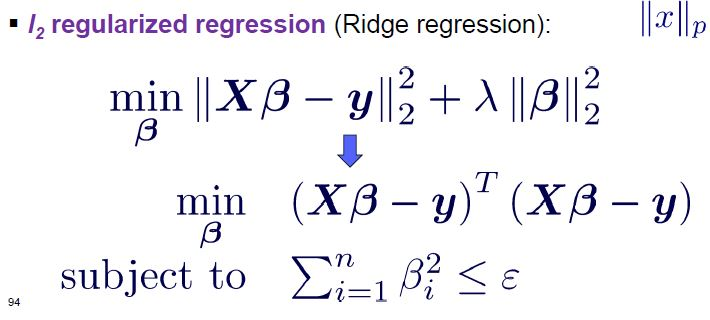

Advantages: 
1. It has closed form solution, thus computational form is not expensive. 
2. It reduces overfitting by regularized the parameters, thus reduce the variance in the model.

Disadvantages: 
1. It does not tell which feature is important, rather it will include them all and this can be seen as not coefficient will have a zero value. 


**Reference:**
1. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c 
2. https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
3. https://scikit-learn.org/stable/modules/feature_selection.html 
4. MIE 1624 Lecture Note 5

_____________________________________________

**3. Random Forest Alogrithms**

Basically, we will have a number of decision trees where every node in the decision trees is a condition on a single feature designed to split the dataset into two similar response values ending up in the same set. Please see reference 1,2,3,4 and 5 below for more details. 

Advantages: 
1. It is more accurate as it reduces the overfitting. 
2. Less variance by using multiple trees, you reduce the chance of stumbling across a classifier that doesn’t perform well because of the relationship between the train and test data.


Disadvantages: 
1. It’s more complex.
2. It’s hard to visualize the model or understand why it predicted something, black box!.
3. It’s more difficult to implement.
4. It’s more computationally expensive.

**Reference:**

1. https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/ 
2. https://blog.datadive.net/selecting-good-features-part-iii-random-forests/
3. https://www.quora.com/What-are-some-advantages-of-using-a-random-forest-over-a-decision-tree-given-that-a-decision-tree-is-simpler 
4. https://www.dataversity.net/machine-learning-algorithms-introduction-random-forests/ 
5. MIE 1624 Lecture note 7.

_____________________________________________

**4. Decision Tree Alogrithms** 

Decision trees are one of the most popular algorithms used in machine learning, mostly for classification but also for regression problems. Our brain works like a decision tree every time we ask ourselves a question before making a decision. For example: is it cloudy outside? If yes, I will bring an umbrella.

When training a dataset to classify a variable, the idea of the Decision Tree is to divide the data into smaller datasets based on a certain feature value until the target variables all fall under one category. Basically, the algorithm chooses the most predictive feature to split the data on based on decrease the information gain. The information gain is the difference between entropy of parent and the average of the children. The information gain tell us how important a given attribute of feature vector. 

So what is Entropy? it is a common measure of target class impurity. There is another measure of impurity called Gini. The difference between Ginin and Entropy is that Gini is computationally faster than entropy 
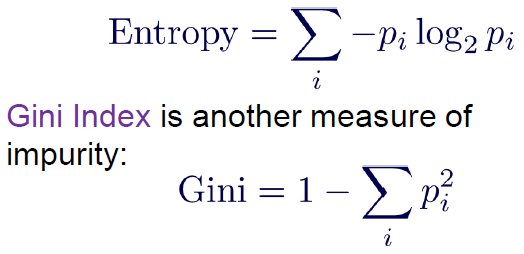



Advantages: 
1. Easy to interpret.
2. can handle numeric or categorical features. 
3. Can handle missing data.
4. Uses only the most important features. 
5. Can be used on very large or small data.

Disadvantages: 
1. Easy to overfit or underfit the model.
2. Can not model interactions between features. 
3. Large trees can nbe difficult to interpret. 


**References:** 
1. MIE 1624 Lecture note 7
2. https://towardsdatascience.com/decision-tree-an-algorithm-that-works-like-the-human-brain-8bc0652f1fc6


In [101]:
# now that we selected the 20 features above and stored in col, we will creating the X and y from new Dataset features
X = sdf[col]
Y =sdf["Q9"].astype(float)
#Splitting the Data using train_test_split in a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

In [102]:
# create a data frame named result DataFrame for storing the result of R2 and RMSE. Both wil be kept for training and cross validation
resultDF = pd.DataFrame(columns= ["Lasso Test R2", "Lasso Train R2","Lasso Test RMSE", "Lasso Train RMSE","Ridge Test R2", "Ridge Train R2","Ridge Test RMSE", "Ridge Train RMSE",
                                 "Random Forest Test R2", "Random Forest Train R2","Random Forest Test RMSE","Random Forest Train RMSE","Decision Tree Test R2","Decision Tree Train R2","Decision Tree Test RMSE","Decision Tree Train RMSE"], 
                        index = ['Mean', 'std_dev', 'Fold 1', 'Fold 2','Fold 3', 'Fold 4', 'Fold 5', 'Fold 6','Fold 7', 'Fold 8', 'Fold 9','Fold 10'])


In [103]:
# create a dictionary that contains the instances models, same concept of pipline used in Assignment 1. we sate the seed to 0, for whenever we run we get same numbers
Models = {"Lasso":Lasso(alpha=0.3),"Ridge":Ridge(alpha=0.3),'Random Forest':RandomForestRegressor(max_depth=10, random_state=0),
          'Decision Tree':DecisionTreeRegressor(max_depth=10 , random_state =0)}

In [104]:
# create a dict to match the error name with its key. 
error_dic = {'test_r2':' Test R2', 'train_r2': ' Train R2','test_neg_mean_squared_error': ' Test RMSE', 'train_neg_mean_squared_error': ' Train RMSE'  }

In [105]:
# run a loop for every model to store the features into our dataframe, so all results will be store in dataframe
for name, m in Models.items():
    # we will cross validating using the training dataset
    # we defined scoring metric to return both Rsquare and negative mean squared error
    scores = cross_validate(m, X_train, y_train, cv=10,scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
    #getting the required errors
    for j in error_dic.keys():
        cur_scores = scores[j]
        # change the Mean Square Error to Root Mean Square Error
        if j =='test_neg_mean_squared_error' or j== 'train_neg_mean_squared_error':
            cur_scores = cur_scores*-1
            cur_scores = np.sqrt(cur_scores)
        cur_name = name+ error_dic[j] 
        # calculating mean and standard deviation
        resultDF[cur_name]['Mean'] = cur_scores.mean()
        resultDF[cur_name]['std_dev'] = cur_scores.std()
        # saving the values ino the Results Dataframe
        k =0
        for i in cur_scores:
            k=k+1
            row = 'Fold '+ str(k)
            resultDF[cur_name][row] = i
            
        

In [106]:
# Display the results
resultDF

,Lasso Test R2,Lasso Train R2,Lasso Test RMSE,Lasso Train RMSE,Ridge Test R2,Ridge Train R2,Ridge Test RMSE,Ridge Train RMSE,Random Forest Test R2,Random Forest Train R2,Random Forest Test RMSE,Random Forest Train RMSE,Decision Tree Test R2,Decision Tree Train R2,Decision Tree Test RMSE,Decision Tree Train RMSE
Mean,0.471565,0.517347,44570.9,42687.5,0.472897,0.517126,44517,42697.3,0.422967,0.657931,46586.8,35936.4,0.229954,0.596444,53812.7,39028.8
std_dev,0.034985,0.00375076,1702.22,172.799,0.0342487,0.00373363,1713.53,174.687,0.0423509,0.00470919,2289.53,269.052,0.0542036,0.013354,2364.07,685.604
Fold 1,0.456859,0.519575,44915.6,42628.5,0.45706,0.519393,44907.3,42636.6,0.431167,0.65936,45965.6,35895.1,0.116353,0.591116,57290.2,39326.7
Fold 2,0.498877,0.514353,45666.3,42575.9,0.497679,0.514222,45720.9,42581.6,0.415383,0.654792,49324.1,35895.8,0.329324,0.592548,52830,38997.9
Fold 3,0.482144,0.516147,43985,42766.3,0.483877,0.515894,43911.4,42777.5,0.373413,0.658751,48382.8,35915.5,0.228283,0.607583,53694.5,38514.1
Fold 4,0.43399,0.520583,45705,42598,0.445494,0.519908,45238.2,42627.9,0.417668,0.664367,46359.3,35642.2,0.189648,0.624018,54687.6,37723.8
Fold 5,0.442357,0.521058,44009.6,42710.9,0.442432,0.520889,44006.7,42718.4,0.361618,0.659176,47088,36029.8,0.23341,0.575354,51600.2,40217.1
Fold 6,0.437248,0.520964,42978.3,42835.5,0.437097,0.520789,42984.1,42843.3,0.435948,0.657992,43028,36194.1,0.244742,0.581963,49789.6,40015.4
Fold 7,0.489954,0.515815,42139.6,42940.1,0.492387,0.515508,42039,42953.7,0.44725,0.656056,43868.2,36191,0.24392,0.608766,51306.2,38599
Fold 8,0.439633,0.520487,48116.5,42324.5,0.438427,0.520442,48168.2,42326.5,0.37903,0.666392,50651.6,35302.8,0.25714,0.589643,55400.2,39153.7


## 4.2 Plots of R2 Error Score for Each Model with Folds

1. Mean R2 values for Training and Validation Data Plot.
2. Standard Deviation R2 values for Training and Validation Data Plot. 
3. R2 Value for 10 Different Folds for Training and Validation for all Models Plot.

#### 1. Mean R2 for Training and Validation Data Plot

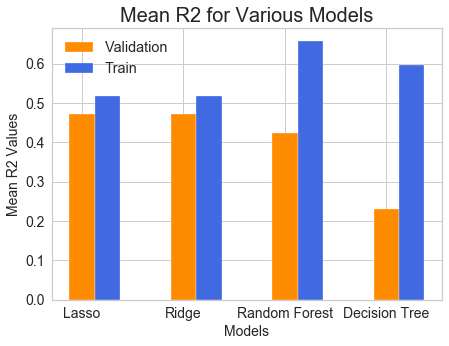

In [107]:
axp = np.arange(4)
# creating lists of mean R2 during trainig and validation respectively
R2_Tests = [resultDF['Lasso Test R2'][0] , resultDF['Ridge Test R2'][0], resultDF['Random Forest Test R2'][0], resultDF['Decision Tree Test R2'][0]]
R2_Train = [resultDF['Lasso Train R2'][0], resultDF['Ridge Train R2'][0], resultDF['Random Forest Train R2'][0] ,resultDF['Decision Tree Train R2'][0]]

# Plotting using a bar chart
plt.figure(figsize = (7,5))
plt.bar(axp + 0.00, R2_Tests, width = 0.25,color='darkorange')
plt.bar(axp + 0.25, R2_Train, width = 0.25,color='royalblue')
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('Mean R2 Values',fontsize=14)
plt.xlabel('Models',fontsize=14)
plt.title('Mean R2 for Various Models', fontsize=20)
plt.legend(["Validation", "Train"],fontsize='x-large')
plt.tick_params(labelsize=14)
plt.show();

**Observation:**

1. From Random Forest and Decision Tree bar plots above, it can be clearly seen that there is a big difference in R2 values between train and validation data. This implies that both models have a lot of overfitting. However, Random Forest performs better than Decision Tree. 

2. From Lasso and Ridge bar plots above, it can be seen that there is only slightly small difference in R2 between train and validation data. This implies that both models do not experinece overfitting of data. 

3. Both Lasso and Ridge models have same R2 values for both validation and training. 
4. Both Lasso and Ridge models validation R2 values are higher than Random Frest and Decision Tree. 

5. Lasso and Ridge are best candidates here!

#### 2. Standard Deviation R2 for Training and Validation Data Plot

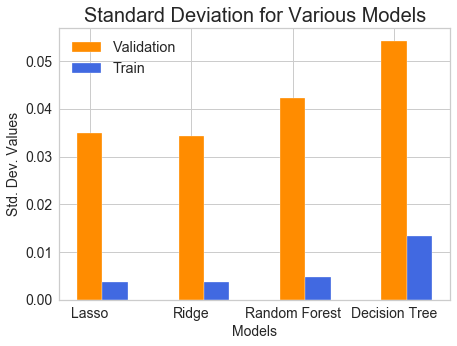

In [108]:
axp = np.arange(4)
#Creating lists of mean R2 during trainig and validation respectively
R2_Tests = [resultDF['Lasso Test R2'][1] , resultDF['Ridge Test R2'][1], resultDF['Random Forest Test R2'][1], resultDF['Decision Tree Test R2'][1]]
R2_Train = [resultDF['Lasso Train R2'][1], resultDF['Ridge Train R2'][1], resultDF['Random Forest Train R2'][1] ,resultDF['Decision Tree Train R2'][1]]

# Plotting using a bar chart
plt.figure(figsize = (7,5))
plt.bar(axp + 0.00, R2_Tests, width = 0.25,color='darkorange')
plt.bar(axp + 0.25, R2_Train, width = 0.25,color='royalblue')
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('Std. Dev. Values',fontsize=14)
plt.xlabel('Models',fontsize=14)
plt.title('Standard Deviation for Various Models', fontsize=20)
plt.legend(['Validation', 'Train'],fontsize='x-large')
plt.tick_params(labelsize=14)
plt.show();


**Observation:**

1. It can be seen that standard deviation R2 values for train and validation in Lasso, Ridge and Random Forest have alomst closed comparable values. However, Decision Tree Std.Dev R2 values are relatively highier than other models. 
2. Both Lasso and Ridge Std.Dev R2 values during training and validation are almost same, so we expect that when we plot them for 10 Fold both curves will overlap each other. 

#### 3. R2 Value for 10 Different Folds for Training and Validation for all Models Plot

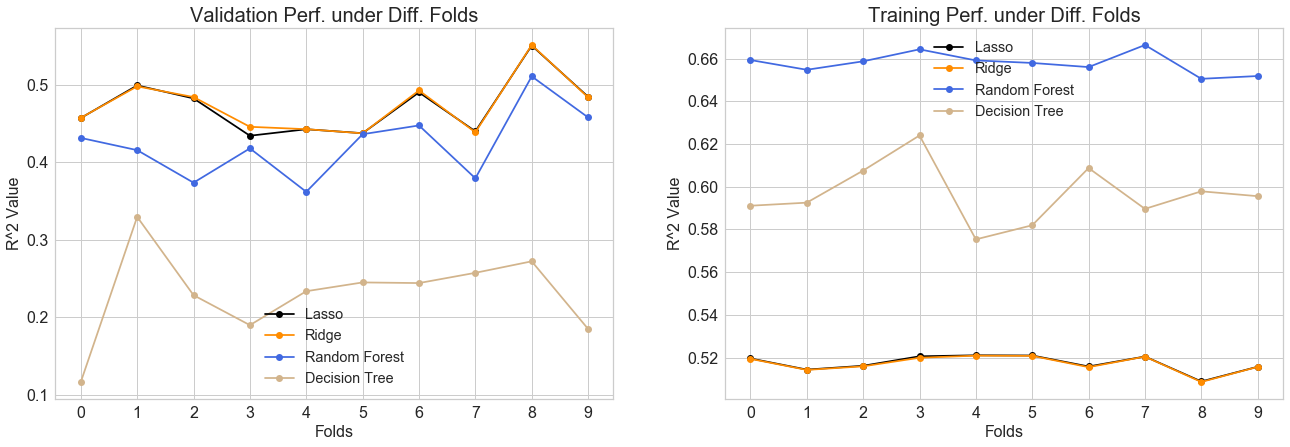

In [109]:
axp = np.arange(10)

#Creating Two Subplots
fig = plt.figure(figsize=(22,15))

#Plotting the Performance of Various Models during Cross Validation
plt.subplot(2, 2, 1)
plt.plot(axp,resultDF['Lasso Test R2'][2:], marker = 'o',label = 'Lasso',color='black')
plt.plot(axp,resultDF['Ridge Test R2'][2:], marker = 'o',label = 'Ridge',color='darkorange')
plt.plot(axp,resultDF['Random Forest Test R2'][2:], marker = 'o',label = 'Random Forest',color='royalblue')
plt.plot(axp,resultDF['Decision Tree Test R2'][2:], marker = 'o',label = 'Decision Tree',color='tan')



plt.xticks(axp)
plt.ylabel('R^2 Value',fontsize=16)
plt.xlabel('Folds',fontsize=16)
plt.title('Validation Perf. under Diff. Folds', fontsize=20)
plt.legend(fontsize='x-large')
plt.tick_params(labelsize=16)

#Plotting the Performance of Various Models during Training
plt.subplot(2, 2, 2)
plt.plot(axp,resultDF['Lasso Train R2'][2:],marker = 'o',label = 'Lasso',color='black')
plt.plot(axp,resultDF['Ridge Train R2'][2:],marker = 'o', label = 'Ridge',color='darkorange')
plt.plot(axp,resultDF['Random Forest Train R2'][2:],marker = 'o', label = 'Random Forest',color='royalblue')
plt.plot(axp,resultDF['Decision Tree Train R2'][2:],marker = 'o', label = 'Decision Tree',color='tan')



plt.xticks(axp)
plt.ylabel('R^2 Value',fontsize=16)
plt.xlabel('Folds',fontsize=16)
plt.title('Training Perf. under Diff. Folds', fontsize=20)
plt.legend(fontsize='x-large')
plt.tick_params(labelsize=16)
plt.show();

**Observation:** 

1. Lasso and Ridge R2 values between the 10 Folds have same behavior over all the folds, they are overlapping each other. 
2. Durining training, there is not much flactuation in R2 values between 10 folds for Lasso, Ridge and Random Forest, while the decision tree plot has some flactuation in R2 values within 10 folds. We has seen this trend behavior above in Std.Dev for training data. 
3. Durining validaition, there is a clearly flactuation om R2 values between all models within 10 folds. 

#### Which Model Performed the Best? 

From above 3 plots analysis for R2 values in term of Mean, Std.Dev and Folds performance, the following conclusion is made: 

**Both models Lasso and Ridge outperform Random Forest and Decision Tree as they have a better R2 values during cross validation in term of Mean, Std.Dev and accross 10 folds.** 


## 4.3 Bias Variance Trade Off Analysis for R2 Values

Here we will study the prediction error within training and cross validation results based on Bias-Variance trade off. 

**Bias-Variance Trade off:**

It is process of minimize two error sources at the same time, this prevents the overfitting and underfitting. 

**Bias:**  

It is the difference between the average prediction of our model and the correct value which we are trying to predict. A model with high bias error tends to experience underfitting. 

**Variance:** 

It is the variability of model prediction for a given data point or a value which tells us spread of our data. A model with high variance error tends to experience overfitting. 

The overall Predication error composed of Bias^2, Variance and Irreducible Error (noise). As it can be seen in the below picture. 
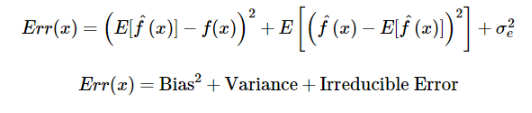



So there is alway trade off, high bias will give low variance tends to underfit the data, in other words,  model is unable to capture the underlying pattern of the data. On the other hand, a high variance will give low bias which tends to overfit the data , in other words, model captures the noise along with the underlying pattern in data. Therefore, we have to have to come up to optimum model that give reasonable error in prediction values. This can be seen in the below figure.

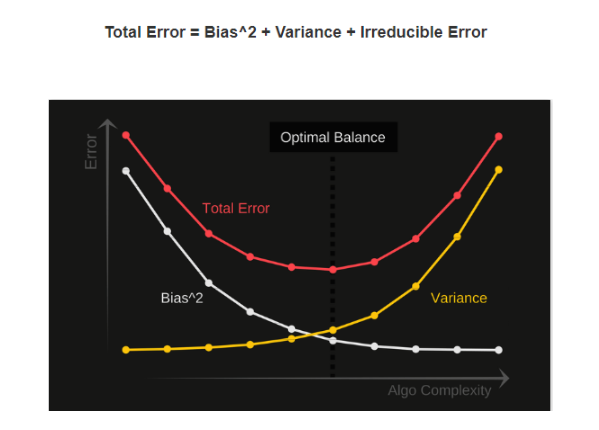

To analyize data by using Bias and Variance Trade off, we have to plot the learning curve. The code for plotting learning curve was obtained from scikit learn reference 3, I could not do it so I copy it and I input my data to it. Please see reference 3 below. 


**Reference:** 
1. MIE 1624 Lecture note 5. 
2. https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229 
3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
4. https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/


In [110]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    train_scores = train_scores*-1
    test_scores = test_scores*-1
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

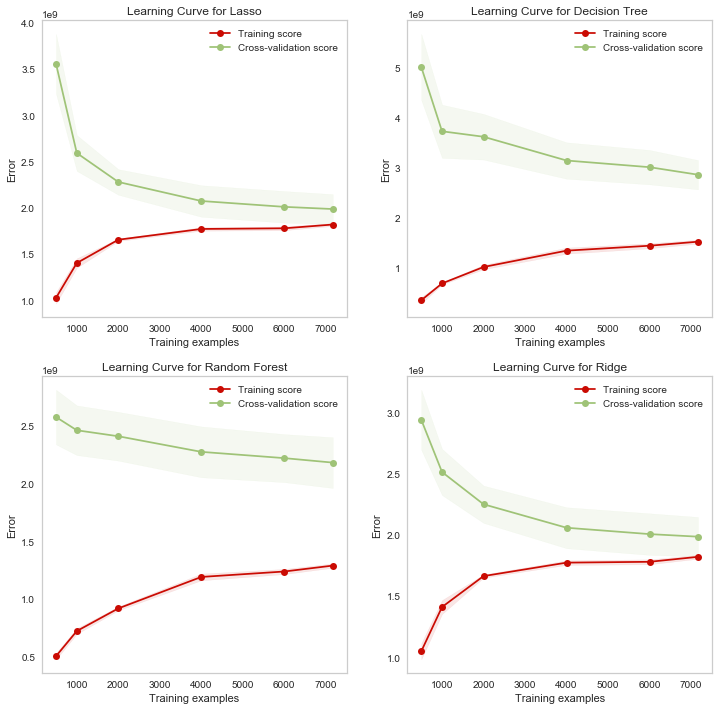

In [111]:
#Creating four subplots for our four models
fig = plt.figure(figsize=(12,12))

# Lasso learning curve
plt.subplot(2, 2, 1)
plot_learning_curve(Lasso(alpha =0.3), 'Learning Curve for Lasso', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

# Ridge learning curve
plt.subplot(2, 2, 4)
plot_learning_curve(Ridge(alpha=0.3), 'Learning Curve for Ridge', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

# Random Forest learning curve
plt.subplot(2, 2, 3)
plot_learning_curve(RandomForestRegressor(max_depth=10, random_state=0), 'Learning Curve for Random Forest', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

# Decision Tree learning curve
plt.subplot(2, 2, 2)
plot_learning_curve(DecisionTreeRegressor(max_depth=10 , random_state =0), 'Learning Curve for Decision Tree', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

plt.show()

#### Which Model Performed the Best? 

The following question will be answered based on bias and variance analyis from above learning curves. 

1. Both Lasso and Ridge models have high error between training and cross validation given large bias error, but the gap difference between both plots training and validation is very low given low variance as both converge as training size increases. Therefore, it tends to underfit the data. 


2. Both Random Forest and Decision Tree models have low error between training and cross validation given low bias error, but the gap difference between both plots training and validation is very large given a high variance as both plots diverge as training expmples increases. 


3. Further detailed analysis, considereing bias only we can see that both Random Forest and Decision Tree perform better than Lasso and Ridge, as they reduce underfitting (This can be seen above in advantages). However, considering only the variance, Lasso and Ridge perform way better than Random Forest and Decision Tree, as they reduce overfitting (This can be seen above in advantegs)

Lasso and Ridge perform the best as the total predicted error is the sum of Bias^2 + Variance, puting values together will give a small error for Ridge and Lasso compare to Random forest and Decision. Therefre, Ridge and Lasso perform better. 


# 5. Hyperparameter Tunning 

Hyper Tuning is the process of tuning constrains of a certain regression model to improve its performance. In other words, adjust the settings paramters of an alogarithm for prupose of optimization or prediction improvement. In this section we will do the following: 

1. Perform tunning for above models by using GridSearch. 
2. After tunning, we will store the values of R2 and RMSE in dataframe for each model just like above in section4 and then we will plot and analysis results for each model. 

**Note:** 
Only most common simply paramters will be used for tunning to reduce computational time, while in some cases they are other parameter can be used. 

**Reference:**

The code for all gridsearch in below technique was obtained from this source, as it was fully modified to serve my data.
1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [112]:
#General scoring function for root square mean error 
# define the rmse function
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))

# Defining the scoring metric to have both r2 and RMSE
scoring = {'R2':'r2', 'RMSE':make_scorer(rmse, greater_is_better=False)}

## 5.1 Lasso Hyper Tunning 

Lasso Tunning Paramters are:

1. alpha: It refers to the Constant that multiplies the L1 term. Therefore, higher the alpha more the regularization would happen.
2. fit_intercept:If set to False, no intercept will be used in calculations.
3. positive: If set to true it would force the coefficients to be positive.
4. selction: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default.

**Referene:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


In [113]:
# Create the parameter grid based on the results of random search 
param_grid = {
    "alpha": [i for i in np.arange(0.2,3,0.1)],
    "fit_intercept": [True, False],
    "positive": [True, False],
    "selection": ["cyclic","random"]
}

lso_grid = Lasso()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lso_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10)
# verbose=10
# Fit the grid search to the data
grid_search=grid_search.fit(X_train,y_train)
lso_grid=grid_search.best_estimator_

In [114]:
print(lso_grid)
print(grid_search.best_score_)

Lasso(alpha=2.700000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False)
0.47355101724622745


In [115]:
# store the score and the tuned model in a dictionary
tuned_results = {'Lasso_score_r2':grid_search.best_score_ , 'Lasso_model' : lso_grid }


In [116]:
# store the RMSE error as well in the same dictionary
tuned_results['Lasso_score_rmse'] = grid_search.cv_results_['mean_test_RMSE'][grid_search.cv_results_['mean_test_R2'].tolist().index(max(grid_search.cv_results_['mean_test_R2'].tolist()))]

In [117]:
print(tuned_results)

{'Lasso_score_r2': 0.47355101724622745, 'Lasso_model': Lasso(alpha=2.700000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -44491.7461057639}


## 5.2 Ridge Hypper Tunning 

Ridge tuning parameters are: 


1. alpha: It refers to the Constant that multiplies the L2 term. Therefore, higher the alpha more the regularization would happen.
2. fit_intercept: If we want to the bo term to be set to zero, the hyperparameter needs to set to False.

3. solver : It determines the solver to use in the computational routines:
    1. ‘auto’ chooses the solver automatically based on the type of data.
    2. ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients.
    3. ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
    4. ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).
    5. ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
    6. ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
    
**Reference:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [118]:
# create the parameter grid based on the results of random search 
param_grid = {
    "alpha": [i for i in np.arange(6,8.2,0.2)],
    "fit_intercept": [True, False],
    "solver": ["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]}

ridge_grid= Ridge()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ridge_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train,y_train)
ridge_grid = grid_search.best_estimator_

In [119]:
print(ridge_grid)
print(grid_search.best_score_)

Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sparse_cg', tol=0.001)
0.475566703846932


In [120]:
# store the R2 score to results dictionary
tuned_results["Ridge_score_R2"]=grid_search.best_score_
tuned_results["Ridge_model"]= ridge_grid

In [121]:
# store the RMSE score to results dictionary
tuned_results["Ridge_score_RMSE"] = grid_search.cv_results_["mean_test_RMSE"][grid_search.cv_results_["mean_test_R2"].tolist().index(max(grid_search.cv_results_["mean_test_R2"].tolist()))]

In [122]:
print(tuned_results)

{'Lasso_score_r2': 0.47355101724622745, 'Lasso_model': Lasso(alpha=2.700000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -44491.7461057639, 'Ridge_score_R2': 0.475566703846932, 'Ridge_model': Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sparse_cg', tol=0.001), 'Ridge_score_RMSE': -44411.8376523113}


## 5.3 Random Forest Hyper Tunning 

Random Forest tunning parameters:

1. max_depth:The maximum depth of the tree. 
2. min_samples_split: The minimum number of samples required to split an internal node.
3. min_samples_leaf': The minimum number of samples required to be at a leaf node.
4. n_estimators:The number of trees in the forest.

**Reference:** 
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 


In [123]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [10,11,12],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [8, 9,10],
    'n_estimators': [100]
}

# Create a based model
rf_grid = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train,y_train)
rf_grid = grid_search.best_estimator_

In [124]:
print(rf_grid)
print(grid_search.best_score_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
0.444042957757091


In [125]:
# stor R2 score results in dictionary
tuned_results["Random_Forest_score_R2"]=grid_search.best_score_ 
tuned_results["Random_Forest_model"]= rf_grid 

In [126]:
# store RMSE score results in dictinoary
tuned_results["Random_Foresr_score_RMSE"] = grid_search.cv_results_["mean_test_RMSE"][grid_search.cv_results_["mean_test_R2"].tolist().index(max(grid_search.cv_results_["mean_test_R2"].tolist()))]

In [127]:
print(tuned_results)

{'Lasso_score_r2': 0.47355101724622745, 'Lasso_model': Lasso(alpha=2.700000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -44491.7461057639, 'Ridge_score_R2': 0.475566703846932, 'Ridge_model': Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sparse_cg', tol=0.001), 'Ridge_score_RMSE': -44411.8376523113, 'Random_Forest_score_R2': 0.444042957757091, 'Random_Forest_model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n

## 5.4 Decision Tree Hyper Tuning 

Decision Tree tunning parameters: 

1. splitter: It determines the strategy used to choose the split at each node. If keept "best", the random tree split on the most relevant feature. If "random", the tree takes a random feature and split it. As a result you tree may end with more depth.
2. max_depth:The maximum depth of the tree. 
3. min_samples_split: The minimum number of samples required to split an internal node.
4. min_samples_leaf:The minimum number of samples required to be at a leaf node.
5. max_features: The number of features to consider when looking for the best split:

    1. If “auto”, then max_features=n_features.
    2. If “log2”, then max_features=log2(n_features).
    3. If None, then max_features=n_features.
    
**Reference:** 
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {
    "max_depth": [i for i in np.arange(20,24,1)],
    "max_features": ["auto", "log2", None],
    "min_samples_leaf":[i for i in range(10,16,1)],
    "min_samples_split": [i for i in range(180,210,10)],
     "splitter":["best","random"]}

detree_grid = DecisionTreeRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = detree_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train,y_train)
detree_grid = grid_search.best_estimator_

In [129]:
print(detree_grid)
print(grid_search.best_score_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=21,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=14, min_samples_split=180,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')
0.3854173415034472


In [130]:
# store R2 score results in dictionary
tuned_results["Decision_Tree_score_R2"]=grid_search.best_score_ 
tuned_results["Decision_Tree_model"]= detree_grid 

In [131]:
# store RMSE score results in dictionary
tuned_results["Decision_Tree_score_RMSE"] = grid_search.cv_results_["mean_test_RMSE"][grid_search.cv_results_["mean_test_R2"].tolist().index(max(grid_search.cv_results_["mean_test_R2"].tolist()))]

In [132]:
print(tuned_results)

{'Lasso_score_r2': 0.47355101724622745, 'Lasso_model': Lasso(alpha=2.700000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -44491.7461057639, 'Ridge_score_R2': 0.475566703846932, 'Ridge_model': Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sparse_cg', tol=0.001), 'Ridge_score_RMSE': -44411.8376523113, 'Random_Forest_score_R2': 0.444042957757091, 'Random_Forest_model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n

In [133]:
# create list of R2 error for all tuned alogarithms
Total_R2_Results = [tuned_results["Lasso_score_r2"],tuned_results["Ridge_score_R2"],tuned_results["Random_Forest_score_R2"],tuned_results["Decision_Tree_score_R2"]]

In [134]:
# create list of RMSE error for all tuned alogarithms
Total_RMSE_Results = [tuned_results["Lasso_score_rmse"],tuned_results["Ridge_score_RMSE"],tuned_results["Random_Foresr_score_RMSE"],tuned_results["Decision_Tree_score_RMSE"]]
Total_RMSE_Results = (pd.Series(Total_RMSE_Results)*-1).tolist()

**Plot the tunned R2 and RMSE scores for only cross validation data**

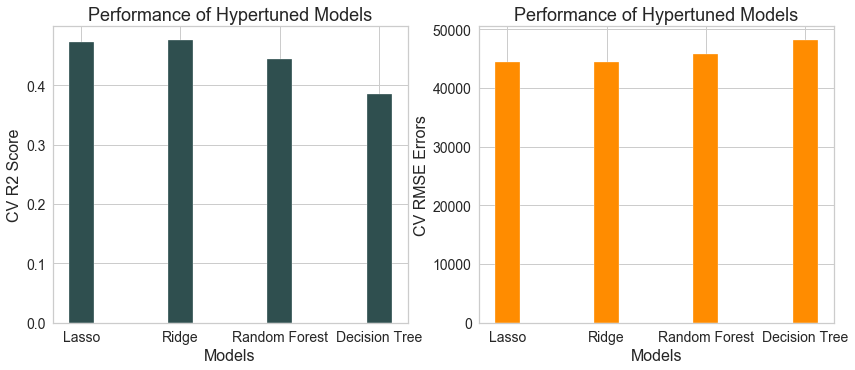

In [135]:
#creating two subplots
fig = plt.figure(figsize=(14,12))

plt.subplot(2, 2, 1)
#plotting the R2 values
plt.bar(np.arange(4), Total_R2_Results, width = 0.25, color = 'darkslategray')
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('CV R2 Score',fontsize=16)
plt.xlabel('Models',fontsize=16)
plt.title('Performance of Hypertuned Models', fontsize=18)

plt.tick_params(labelsize=14)


plt.subplot(2, 2, 2)
#plotting the RMSE values
plt.bar(np.arange(4), Total_RMSE_Results, width = 0.25, color = 'darkorange')
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('CV RMSE Errors',fontsize=16)
plt.xlabel('Models',fontsize=16)
plt.title('Performance of Hypertuned Models', fontsize=18)
plt.tick_params(labelsize=14)
plt.show();

**Observation:** 
1. The Ridge model perform the best among the four models with R2 value of 0.476, it has a high R2 value and low RMSE value which indicates that it is a good model to perform testing on it. Lasso perform well it has R2 value of 0.474 slighlty lower than Ridge, but consider numbers, Ridge is the best. 

2. All R2 and RMSE values after tunning improved, R2 values incerased and RMSE values decreased for all models. 

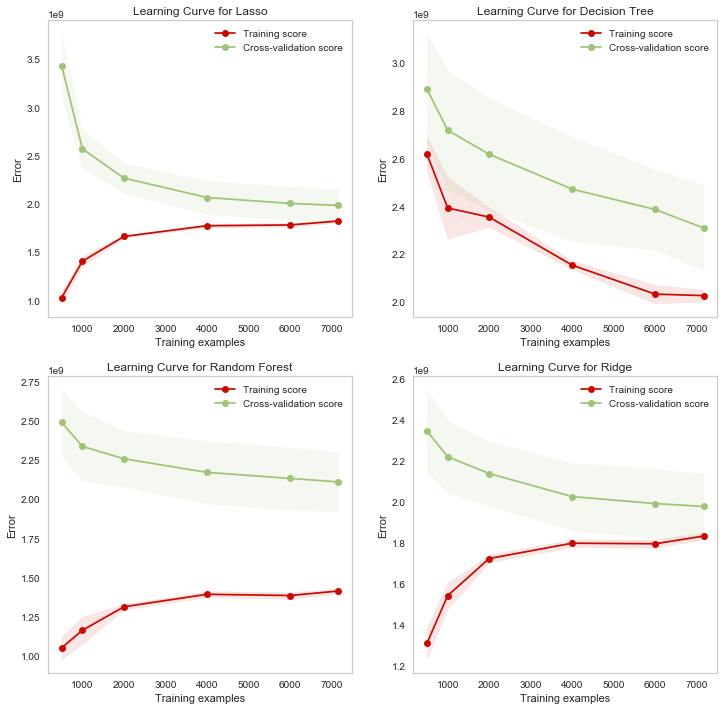

In [136]:
#Creating four subplots for our four models after tunning
fig = plt.figure(figsize=(12,12))

# Lasso learning curve
plt.subplot(2, 2, 1)
plot_learning_curve(tuned_results['Lasso_model'], 'Learning Curve for Lasso', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

# Ridge learning curve
plt.subplot(2, 2, 4)
plot_learning_curve(tuned_results["Ridge_model"], 'Learning Curve for Ridge', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

# Random Forest learning curve
plt.subplot(2, 2, 3)
plot_learning_curve(tuned_results["Random_Forest_model"], 'Learning Curve for Random Forest', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

# Decision Tree learning curve
plt.subplot(2, 2, 2)
plot_learning_curve(tuned_results["Decision_Tree_model"], 'Learning Curve for Decision Tree', X_train,y_train, cv = 10,train_sizes = [500, 1000,2000,4000,6000,7166])

plt.show()

#### How does the model apply to the dataset? 

* Previous Lasso and Ridge model with CV had low variance, after tunning the R2 value improved, therfore the bias has been reduced and increase the variance. 

* Previous Random Forest and Decision tree modesl with CV had high variance, after tunning R2 value decreased, therfore the bias has been increased and decreased the variance. 

* After tunning, as we can see that Ridge and Lasso are still the best models in terms the total error. But, Ridge over perform Lasso. And using the model after tunning, we can expect a little overfitting in the model. 

# 6. Testing on Test Data

We can conclude from Model implementation and Hyper Tunning that Ridge is the optimal alogarithm to make prediction for our hidden data.

In [137]:
#optimal model 
optimal_model = tuned_results['Ridge_model']
coeff = optimal_model.coef_.tolist()

In [138]:
# again define the metric score function
def rmse(X_predi, Y_targ):
    return np.sqrt(((X_predi - Y_targ) ** 2).mean())

Test_Data_R2 = optimal_model.score(X_test, y_test)
Test_Data_RMSE = rmse(optimal_model.predict(X_test),y_test)

In [139]:
Train_Data_R2 = tuned_results["Ridge_score_R2"]
Train_Data_RMSE = tuned_results["Ridge_score_RMSE"]
Train_Data_RMSE = Train_Data_RMSE*-1

**Plot R2 and RMSE score for training and testing data**

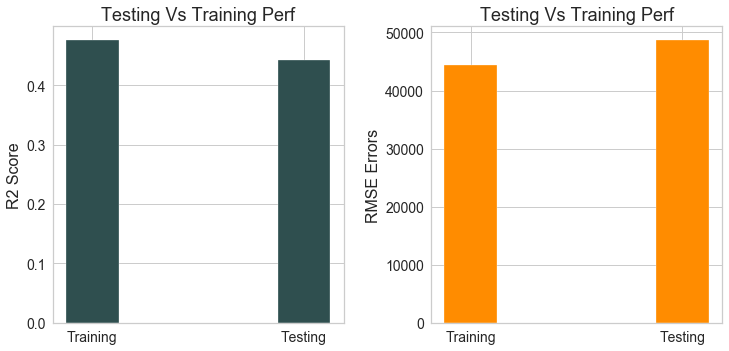

In [140]:
#creating a dummy variable as a place holder
x = np.arange(2)
#creating two subplots
fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.subplot(2, 2, 1)
#plotting the R2 values
plt.bar(x , [Train_Data_R2 , Test_Data_R2], width = 0.25, color='darkslategray')
plt.xticks(np.arange(2), ('Training','Testing'))
plt.ylabel('R2 Score',fontsize=16)
plt.title('Testing Vs Training Perf', fontsize=18)
plt.tick_params(labelsize=14)

plt.subplot(2, 2, 2)
#plotting the RMSE values
plt.bar(x, [Train_Data_RMSE, Test_Data_RMSE], width = 0.25,color = 'darkorange')
plt.xticks(np.arange(2), ('Training','Testing'))
plt.ylabel('RMSE Errors',fontsize=16)
plt.title('Testing Vs Training Perf', fontsize=18)
plt.tick_params(labelsize=14)
plt.show();

#### How does your model perform on the testing set and training sets? 

* On the training sets the model perform better in terms R2 and RMSE. It has a high value for R2 and lower value for RMSE. 

* On the testing sets the model perform relatvely not good as it has lower R2 value and highier RMSE. 
* The model will overfit the data as training score is greater than testing score. But it will not experience a lot of overfitting as difference between both score is very small. We can also confirm this from residual plot below. 

### Overall Fit of the Model

As discussed in class of MIE 1624 in lecture 5 for different types of models and its errors, a good way to understnad overall fit of your model is by plot the residual. Here I am using Yellow Brick API found in the below sources. Also same code was obtained from there as well.

**Observations from residual:**
1. The dataset residual follows a normal distribution behaviour about ZERO, and small slight upper tail towards the negative end. 

2. It can be seen that model fits almost all the data as most of the spotted points are around the mean. 

3. There are some outliers points in both training and testing data that results in a very high salary. 

4. There is low bias in the model as some points in both triaing and testing data have very low residual.

5. There is  not too high variance in the model, it depends on the training points and While this would be acceptable if the training observations perfectly represented the true function, because there is noise in the data, our model ends up fitting the noise. But still not too high variance.  

**Overfitting or Underfitting:** 

From below residual plot observation, it can be concluded that model is slightly overfitting the dataset. Why? because we have a low bias in and slightly high variance as the model memorize the training sets, and not learning the realtionship. Most possible reasons for overfitting is because of: 

1. Data shuffling from kaggle team ,for privacy of some information of respodants could be a reason.
2. The data may exhibit nonlinearity disribution and can not be represnted by linear alogarithm for feature selection, therfore, may be polynomial model could do much better. 
3. Human error in misunderstnading the question survey lead to irrational data point. Therefore, these irrational points when imputated based on mode or other technique will lead to distoration in target value which is Salary here, and this will lead to create outliers as we observed above. 
4. There are outlier is some features such as a student can earn more than 150 K a year!

**Reference:**

1. http://www.scikit-yb.org/en/latest/api/regressor/residuals.html
2. https://www.scikit-yb.org/en/latest/api/regressor/

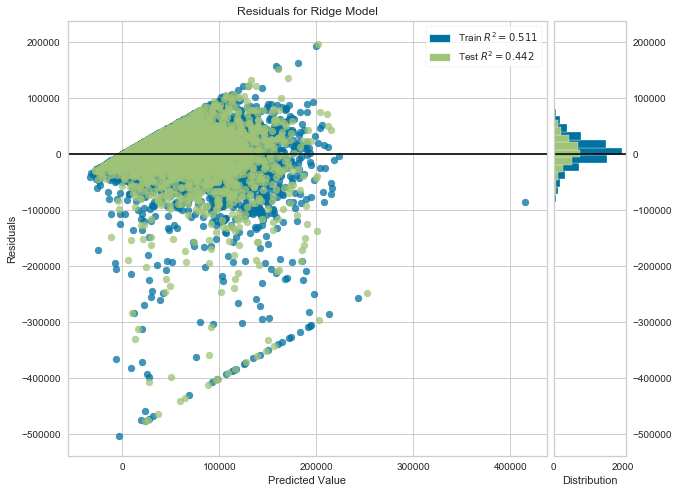

In [141]:
# Instantiate the linear model and visualizer
plt.figure(figsize=(10,8))
visualizer = ResidualsPlot(optimal_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test) # Evaluate the model on the test data
# plt.title('Residuals for Ridge Model', fontsize=20)
# plt.ylabel('Residuals',fontsize=16)
# plt.xlabel('Predicted Value',fontsize=16)
# plt.tick_params(labelsize=14)

visualizer.show();                 # Draw/show/poof the data   

#### How to increase accuracy of model?

1. Get rid of outliers in your training data by eleminate the caused of outlier, in this case here imputation of data. 
2. Improve imputation process by understanding relationship bewteen each features. 
3. Do feature engineering that can add some related features that more suitable to represent the data. 
4. Use other techniques to give a better fit to your model such as 
    1. Neural Networks. 
    2. Gradient boosting for Random Forest and Decision Tree to minmize the error. 
    3. Ensemble models are combining multiple models to improve the accuracy using bagging and boosting. This ensembling can improve the predictive performance more than any single model. 
    
**Reference:** 

1. https://channels.theinnovationenterprise.com/articles/5-ways-to-improve-the-model-accuracy-of-machine-learning 
2. https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/ 

**Note:** 

* As you can see, a lot of information here was added,therefore, I included sources for any information used here with its refernce either from internet, class lecture notes or class group presentation. 

* Any code used from internet was cited and sources of it was included. Few codes was used from the class lecture jupiter notes as well as Tutorial Juoiter notes, as those are open source to all the students in class, I did not include them, but I make sure that I modyif it to my dataset as some codes are unrelvant. 